# Initialize

In [1]:
%load_ext autoreload
%autoreload 2

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn

import pickle

import sys
sys.path.append('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders')

from AE.models import AE_0
from AE.datasets import MNISTDigit2Dataset, MNISTDigit2OnlyDataset, FEMNISTDataset

from AE.overlaps import compute_all_decoded_features_dist_over_repetitions, compute_all_decoded_features_distances_without_repetitions
from AE.overlaps import plot_labels_frequencies_histogram, compute_min_distances_frequencies, find_first_occurrences, get_datapoints_labels_arrays, plot_unique_frequencies_histogram

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Utilizzo Apple Silicon GPU (MPS)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Utilizzo NVIDIA GPU (CUDA)")
else:
    device = torch.device("cpu")
    print("Utilizzo la CPU")

device = torch.device("cpu")  # Fallback to CPU if no GPU is available

SEED = 42
torch.manual_seed(SEED)

Utilizzo Apple Silicon GPU (MPS)



# Datasets


In [550]:

batch_size = 64

## MNIST
train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )



## ExtendedMNIST

train_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )


## 2MNIST

dataset_2MNIST_train = MNISTDigit2Dataset(train=True, download=True, target_size=60000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
train_loader_2MNIST = DataLoader(dataset_2MNIST_train, batch_size=batch_size, shuffle=True)

batch_images, batch_labels = next(iter(train_loader_2MNIST))
print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")

print("\n––––––––––––––––––––––––––––––––––––––––––––––––––––––\n")

dataset_2MNIST_val = MNISTDigit2Dataset(train=False, download=True, target_size=10000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")
val_loader_2MNIST = DataLoader(dataset_2MNIST_val, batch_size=batch_size, shuffle=True)

print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")




#-------------------------------------------------------------------


# datasets = ["MNIST", "EMNIST", "2MNIST"]
train_loaders = {
    "MNIST": train_loader_MNIST,
    "EMNIST": train_loader_EMNIST,
    "2MNIST": train_loader_2MNIST
}
val_loaders = {
    "MNIST": val_loader_MNIST,
    "EMNIST": val_loader_EMNIST,
    "2MNIST": val_loader_2MNIST
}

Found 5958 original samples of digit '2'
Generated 60000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True

––––––––––––––––––––––––––––––––––––––––––––––––––––––

Found 1032 original samples of digit '2'
Generated 10000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
All labels are 2: True
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True


In [ ]:

batch_size = 64


train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )



train_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )




dataset_2MNISTonly_train = MNISTDigit2OnlyDataset(train=True, download=True)
train_loader_2MNISTonly = DataLoader(dataset_2MNISTonly_train, batch_size=batch_size, shuffle=True)

dataset_2MNISTonly_val = MNISTDigit2OnlyDataset(train=False, download=True)
val_loader_2MNISTonly = DataLoader(dataset_2MNISTonly_val, batch_size=batch_size, shuffle=True)




datasets = ["MNIST", "EMNIST", "2MNISTonly"]
train_loaders = {
    "MNIST": train_loader_MNIST,
    "EMNIST": train_loader_EMNIST,
    "2MNISTonly": train_loader_2MNISTonly
}
val_loaders = {
    "MNIST": val_loader_MNIST,
    "EMNIST": val_loader_EMNIST,
    "2MNISTonly": val_loader_2MNISTonly
}


In [ ]:


dataset_FEMNIST_train = FEMNISTDataset(train=True, download=True)
train_loader_FEMNIST = DataLoader(dataset_FEMNIST_train, batch_size=batch_size, shuffle=True)
dataset_FEMNIST_val = FEMNISTDataset(train=False, download=True)
val_loader_FEMNIST = DataLoader(dataset_FEMNIST_val, batch_size=batch_size, shuffle=True)


train_loaders["FEMNIST"] = train_loader_FEMNIST
val_loaders["FEMNIST"] = val_loader_FEMNIST
print(len(train_loader_FEMNIST.dataset))


## FashionMNIST

In [ ]:

train_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )



# Analysis

In [51]:
datasets = ("2MNIST", "MNIST", "EMNIST")

def compute_overlap_matrix(datasets, model_path_kwargs, model_kwargs, repetitions=(0, 0)):

    distances_mean_matrix = np.zeros((len(datasets), len(datasets)))
    distances_std_matrix = np.zeros((len(datasets), len(datasets)))

    for i, dataset_i in enumerate(datasets):
        for j, dataset_j in enumerate(datasets):
            
            # if dataset_i == dataset_j:
            #     continue

            dataset_pair = (dataset_i, dataset_j)

            distances = compute_all_decoded_features_distances_without_repetitions(
                    model_path_kwargs=model_path_kwargs,
                    model_kwargs=model_kwargs,
                    repetitions=repetitions,
                    datasets=dataset_pair
                )

            distances_mean = distances.mean()
            distances_std = distances.std()

            distances_mean_matrix[i, j] = distances_mean
            distances_std_matrix[i, j] = distances_std

    return distances_mean_matrix, distances_std_matrix


In [4]:
def compute_overlap_matrix_for_repetitions(datasets, model_path_kwargs, model_kwargs, repetitions):
    distances_mean_matrices = []
    distances_std_matrices = []

    for rep_i in repetitions:
        for rep_j in repetitions:

            distances_mean_matrix, distances_std_matrix = compute_overlap_matrix(datasets, model_path_kwargs, model_kwargs, repetitions=(rep_i, rep_j))
            distances_mean_matrices.append(distances_mean_matrix)
            distances_std_matrices.append(distances_std_matrix)

    mean_of_distances_means = np.mean(distances_mean_matrices, axis=0)
    mean_of_distances_stds = np.mean(distances_std_matrices, axis=0)


    return mean_of_distances_means, mean_of_distances_stds

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap_heatmap(overlap_matrix, dataset_names=None, title="Overlap Matrix Heatmap", cmap="magma", vmin=0, vmax=12, ax=None):
    if ax is None:
        ax = plt.gca()
    im = ax.imshow(overlap_matrix, interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.colorbar(im, ax=ax, label="Overlap Value")
    if dataset_names is not None:
        ax.set_xticks(np.arange(len(dataset_names)))
        ax.set_xticklabels(dataset_names, rotation=45)
        ax.set_yticks(np.arange(len(dataset_names)))
        ax.set_yticklabels(dataset_names)
    ax.set_title(title)
    ax.set_xlabel("Dataset")
    ax.set_ylabel("Dataset")
    plt.tight_layout()

In [64]:
from AE.plotter_functions import save_fig

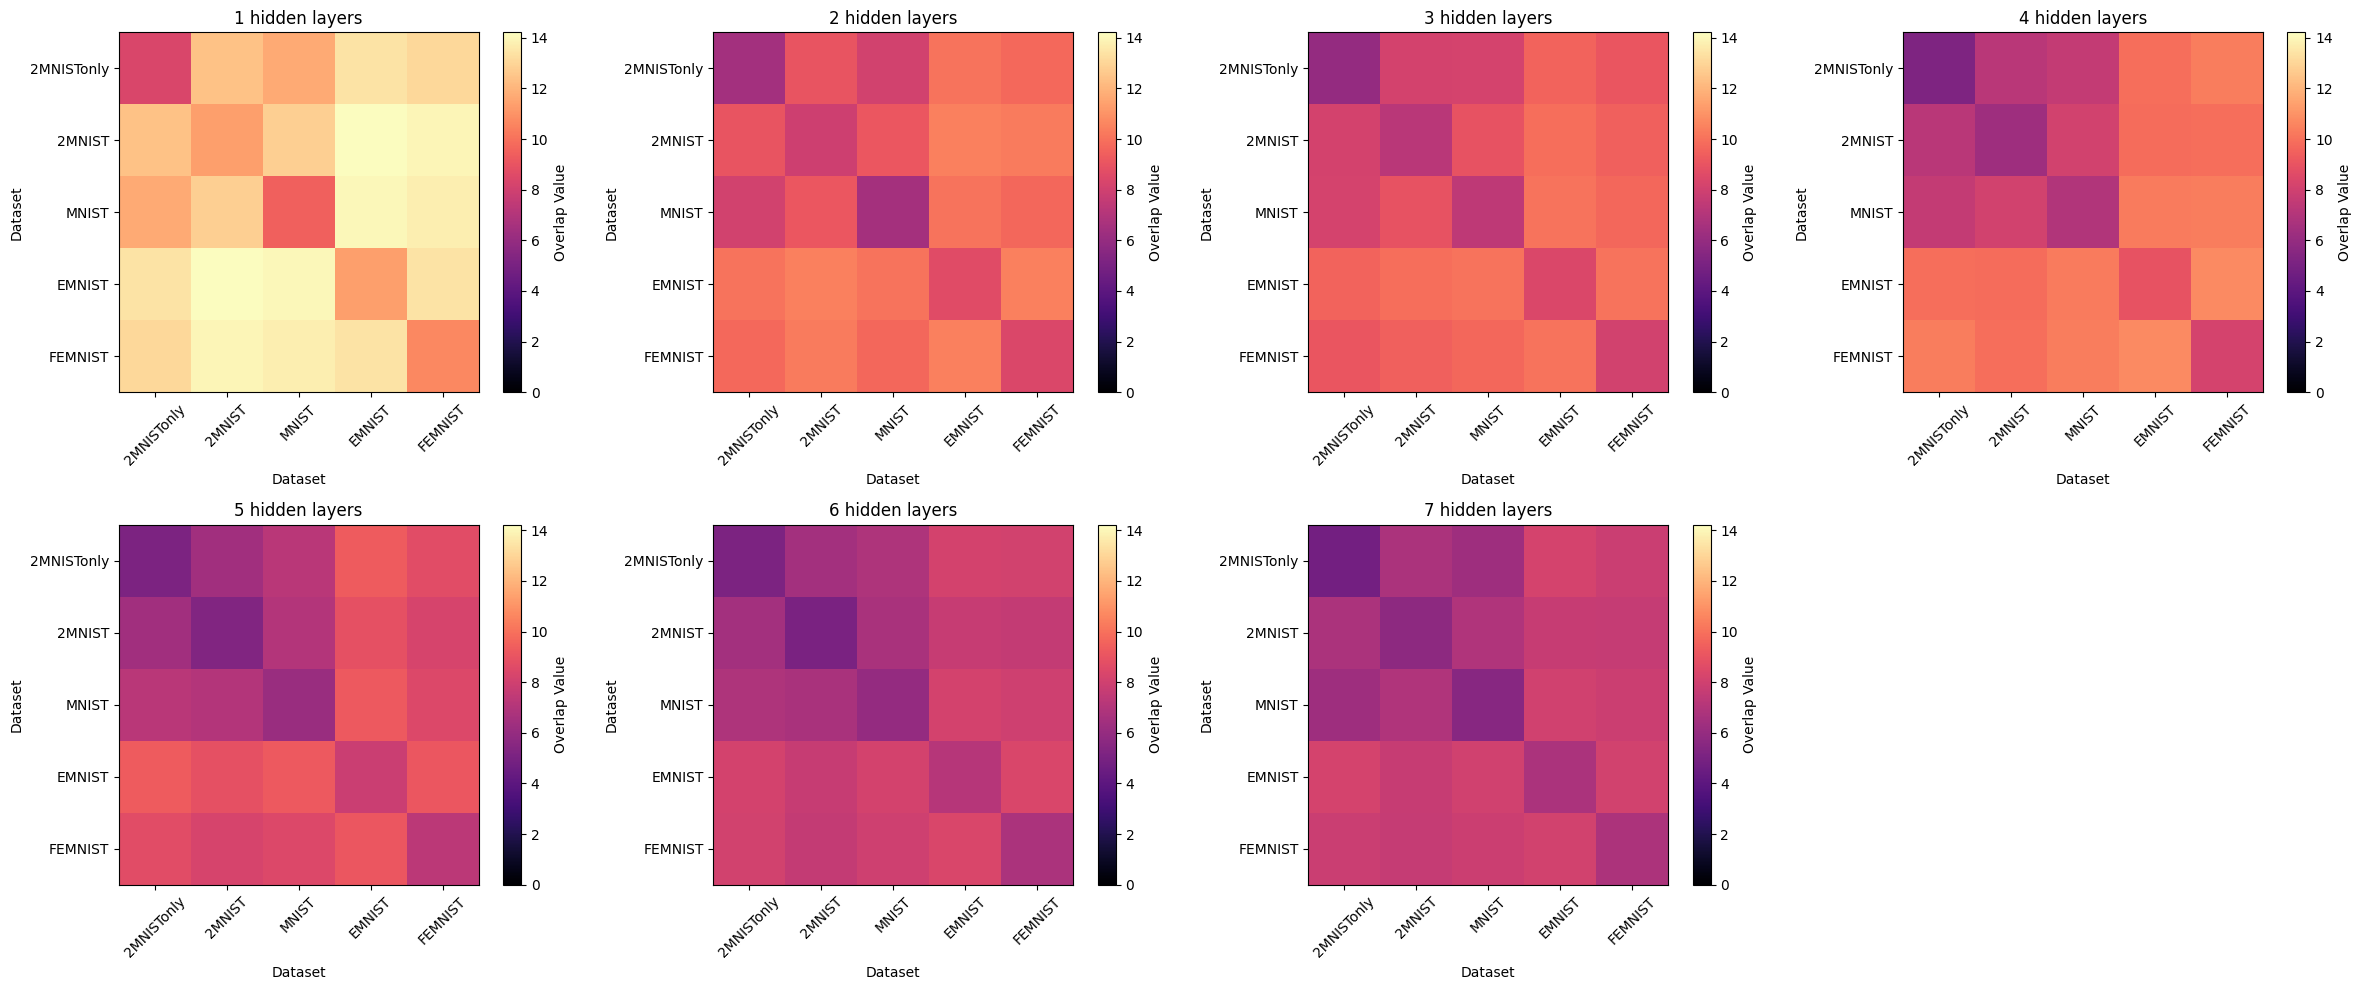

In [65]:
ld = 10

model_kwargs = {
    'input_dim': 28*28,
    'latent_dim': ld,
    'decrease_rate': 0.6,
    'device': device,
    'output_activation_encoder': nn.Sigmoid
}
model_path_kwargs = {
    'output_activation_encoder': 'sigmoid output',
    'train_type': 'simultaneous train',
    'latent_dim': f"{model_kwargs['latent_dim']}ld",
    'decrease_rate': '06',
    'learning_rate': '1e3',
    'train_num': 0,
}

datasets = ("2MNISTonly", "2MNIST", "MNIST", "EMNIST", "FEMNIST")

fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # 2 rows, 4 columns

vmax = None

mean_of_distances_means_dict = {}
mean_of_distances_stds_dict = {}

for i, num_hidden_layers in enumerate(range(1, 8)):
    row = i // 4
    col = i % 4
    model_kwargs['hidden_layers'] = num_hidden_layers
    model_path_kwargs['num_hidden_layers'] = num_hidden_layers
    mean_of_distances_means, mean_of_distances_stds = compute_overlap_matrix_for_repetitions(
        datasets, model_path_kwargs, model_kwargs, repetitions=range(6)
    )
    mean_of_distances_means_dict[num_hidden_layers] = mean_of_distances_means
    mean_of_distances_stds_dict[num_hidden_layers] = mean_of_distances_stds
    if i == 0:
        vmax = np.max(mean_of_distances_means)
    plot_overlap_heatmap(mean_of_distances_means, datasets, title=f"{num_hidden_layers} hidden layers", ax=axes[row, col], vmax=vmax)

axes[1, 3].axis('off')

plt.tight_layout()

plt.savefig(f"../preliminary data/overlaps/images/overlap_matrices_{ld}ld.png")
plt.show()


with open(f"../preliminary data/overlaps/overlaps_{ld}ld.txt", "w") as f:
    for di in range(len(datasets)):
        for dj in range(len(datasets)):
            f.write(f"{datasets[di]} to {datasets[dj]} \n")
            for num_hidden_layers in range(1, 8):
                f.write(f"d({num_hidden_layers}) = {mean_of_distances_means_dict[num_hidden_layers][di, dj]:.4f} \n")
                f.write(f"std({num_hidden_layers}) = {mean_of_distances_stds_dict[num_hidden_layers][di, dj]:.4f} \n")
            f.write("\n")

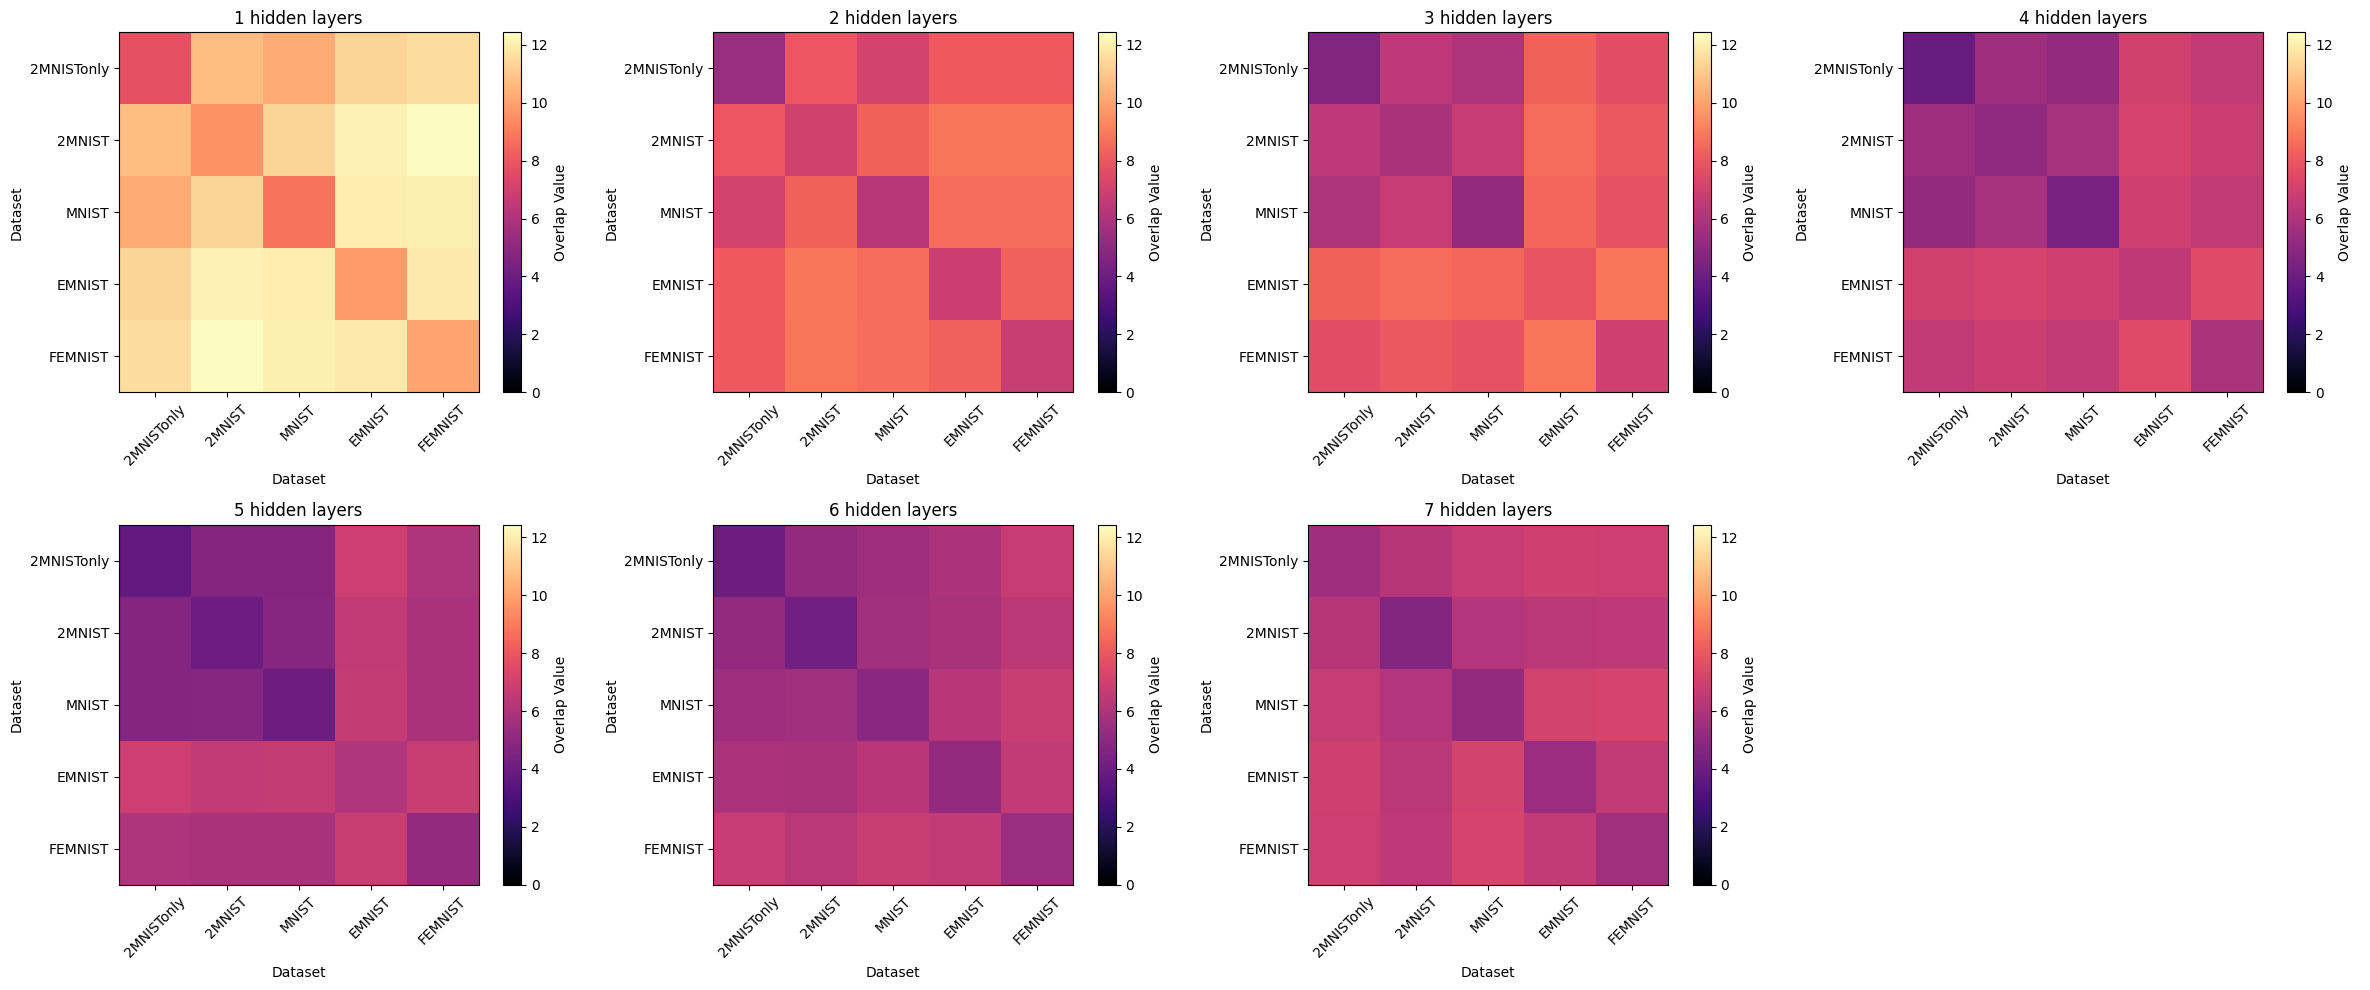

In [67]:
ld = 14

model_kwargs = {
    'input_dim': 28*28,
    'latent_dim': ld,
    'decrease_rate': 0.6,
    'device': device,
    'output_activation_encoder': nn.Sigmoid
}
model_path_kwargs = {
    'output_activation_encoder': 'sigmoid output',
    'train_type': 'simultaneous train',
    'latent_dim': f"{model_kwargs['latent_dim']}ld",
    'decrease_rate': '06',
    'learning_rate': '1e3',
    'train_num': 0,
}

datasets = ("2MNISTonly", "2MNIST", "MNIST", "EMNIST", "FEMNIST")

fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # 2 rows, 4 columns

vmax = None

mean_of_distances_means_dict = {}
mean_of_distances_stds_dict = {}

for i, num_hidden_layers in enumerate(range(1, 8)):
    row = i // 4
    col = i % 4
    model_kwargs['hidden_layers'] = num_hidden_layers
    model_path_kwargs['num_hidden_layers'] = num_hidden_layers
    mean_of_distances_means, mean_of_distances_stds = compute_overlap_matrix_for_repetitions(
        datasets, model_path_kwargs, model_kwargs, repetitions=range(6)
    )
    mean_of_distances_means_dict[num_hidden_layers] = mean_of_distances_means
    mean_of_distances_stds_dict[num_hidden_layers] = mean_of_distances_stds
    if i == 0:
        vmax = np.max(mean_of_distances_means)
    plot_overlap_heatmap(mean_of_distances_means, datasets, title=f"{num_hidden_layers} hidden layers", ax=axes[row, col], vmax=vmax)

axes[1, 3].axis('off')

plt.tight_layout()

plt.savefig(f"../preliminary data/overlaps/images/overlap_matrices_{ld}ld.png")
plt.show()


with open(f"../preliminary data/overlaps/overlaps_{ld}ld.txt", "w") as f:
    for di in range(len(datasets)):
        for dj in range(len(datasets)):
            f.write(f"{datasets[di]} to {datasets[dj]} \n")
            for num_hidden_layers in range(1, 8):
                f.write(f"d({num_hidden_layers}) = {mean_of_distances_means_dict[num_hidden_layers][di, dj]:.4f} \n")
                f.write(f"std({num_hidden_layers}) = {mean_of_distances_stds_dict[num_hidden_layers][di, dj]:.4f} \n")
            f.write("\n")

# Superposition

In [ ]:
from AE.plotter_functions import visualize_bottleneck_neurons
from AE.overlaps import load_model
from AE.plotter_functions import visualize_decoded_from_latent_vectors, plot_original_vs_decoded

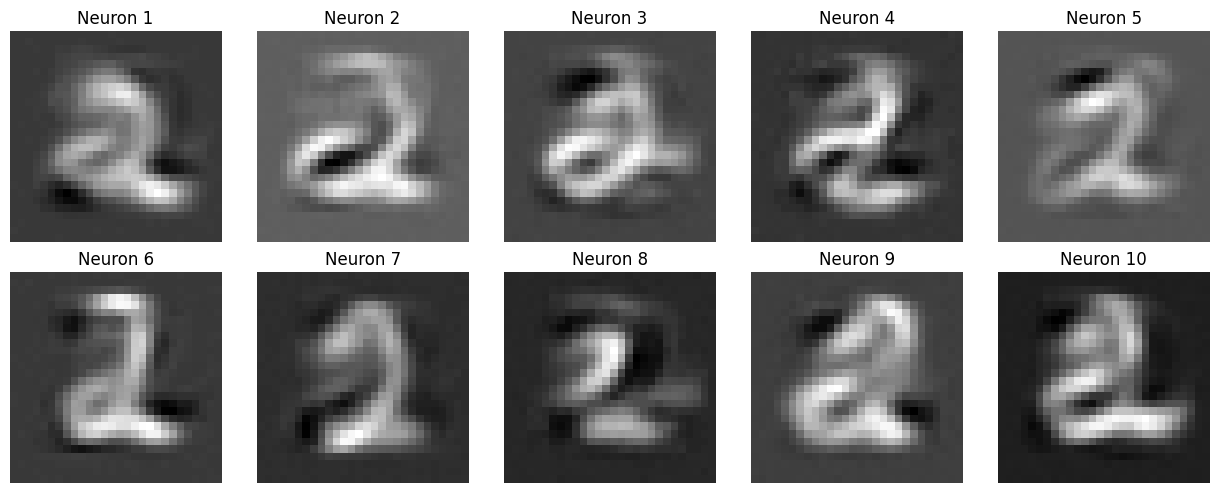

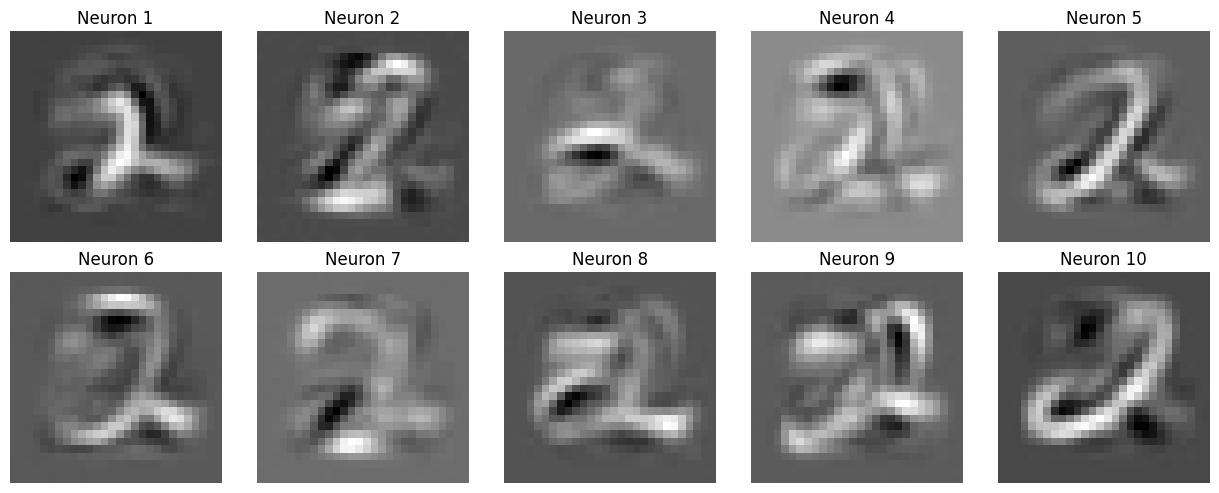

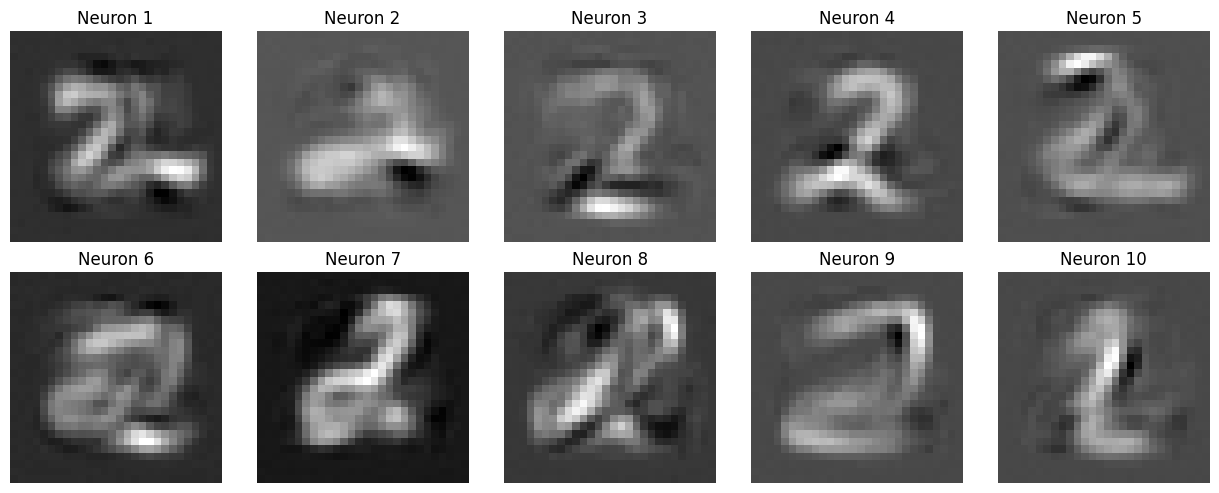

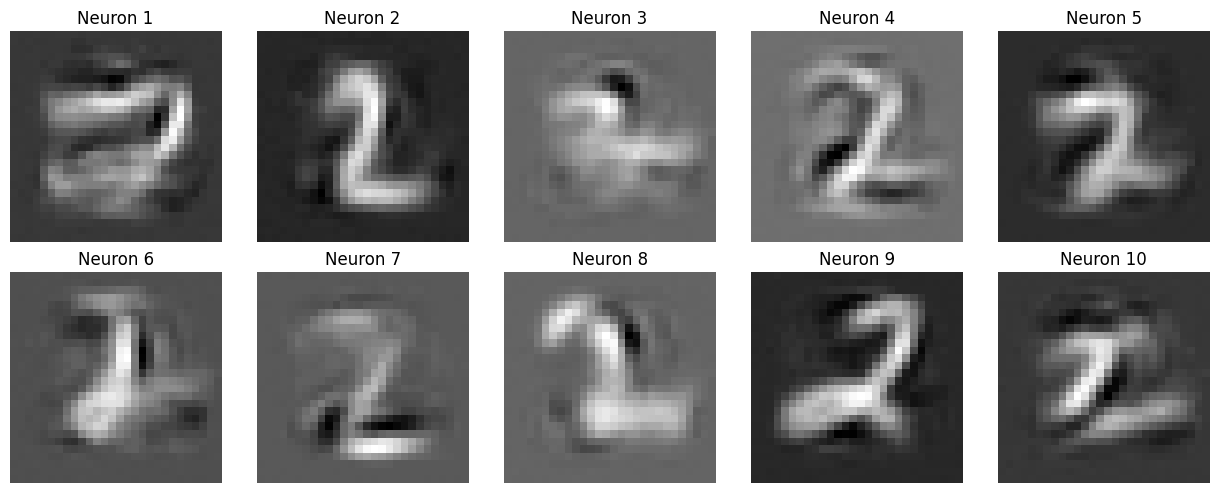

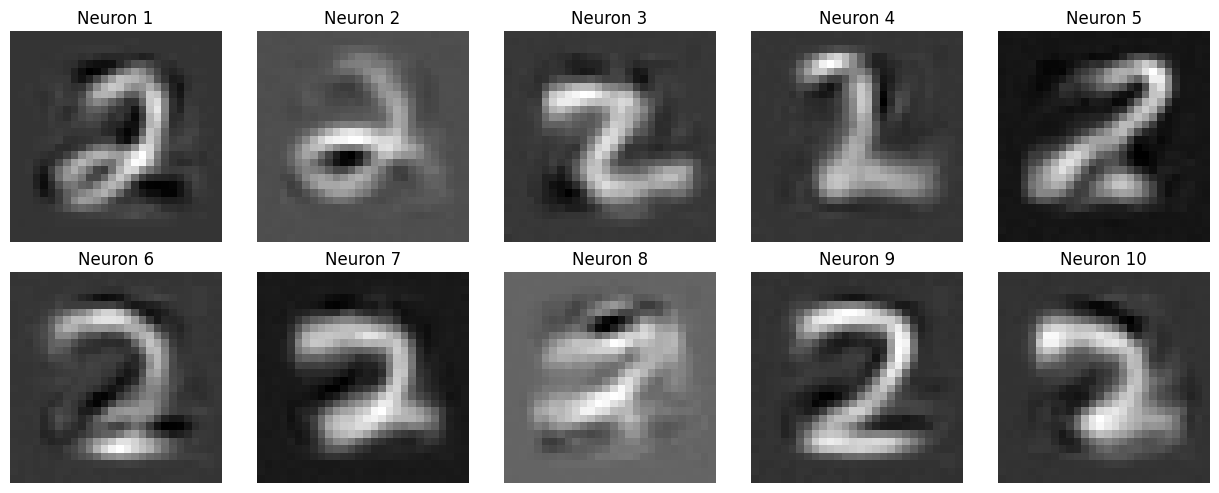

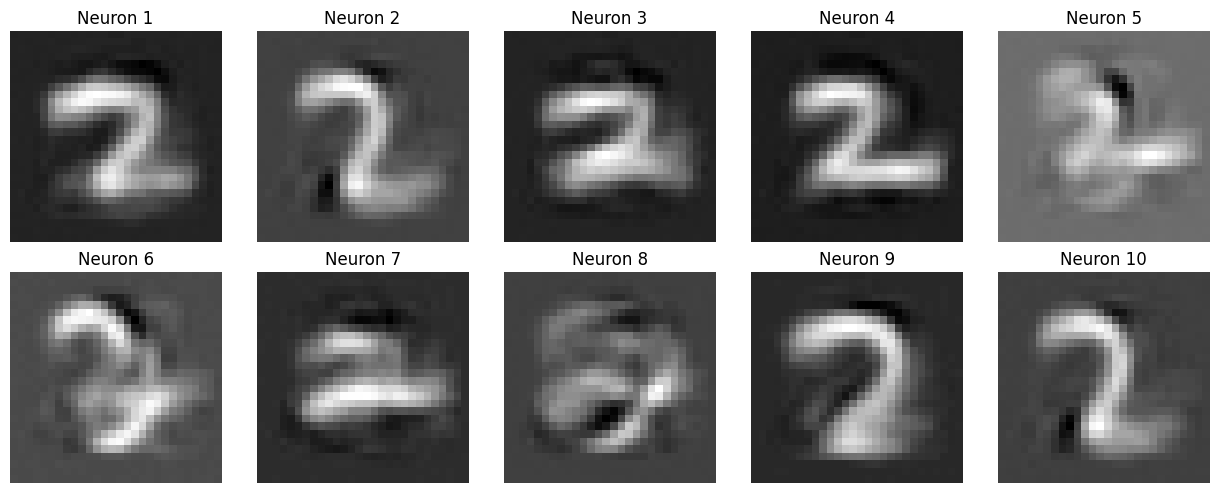

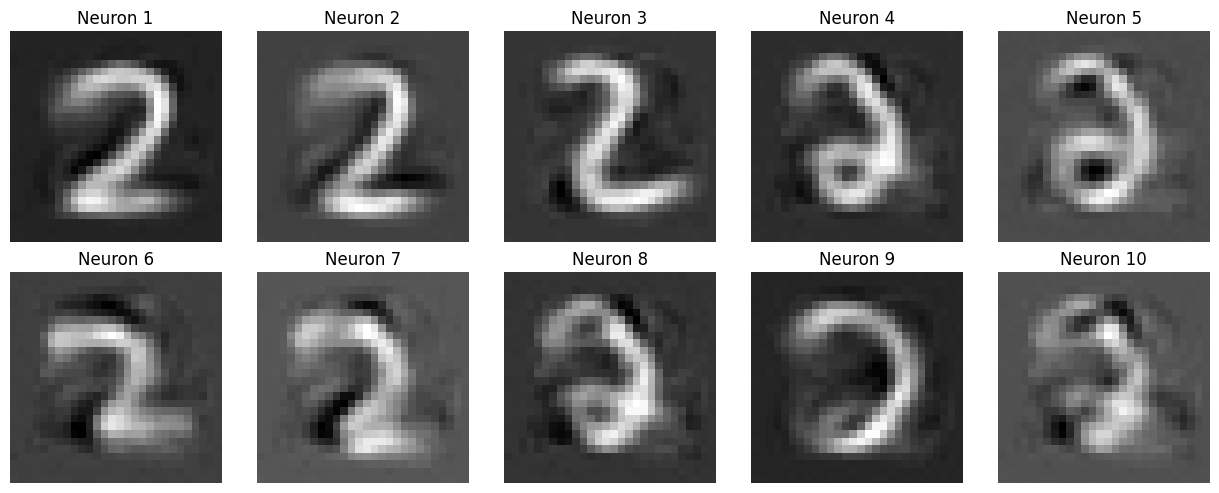

In [533]:
ld = 10

model_kwargs = {
    'input_dim': 28*28,
    'latent_dim': ld,
    'decrease_rate': 0.6,
    'device': device,
    'output_activation_encoder': nn.Sigmoid
}
model_path_kwargs = {
    'output_activation_encoder': 'sigmoid output',
    'train_type': 'simultaneous train',
    'latent_dim': f"{model_kwargs['latent_dim']}ld",
    'decrease_rate': '06',
    'learning_rate': '1e3',
    'train_num': 2,
}

for num_hidden_layers in range(1, 8):
    model_kwargs['hidden_layers'] = num_hidden_layers
    model_path_kwargs['num_hidden_layers'] = num_hidden_layers
    model_path_kwargs['dataset'] = '2MNISTonly'

    my_model = load_model(model_path_kwargs, model_kwargs)

    visualize_bottleneck_neurons(my_model, device, img_shape=(28, 28))

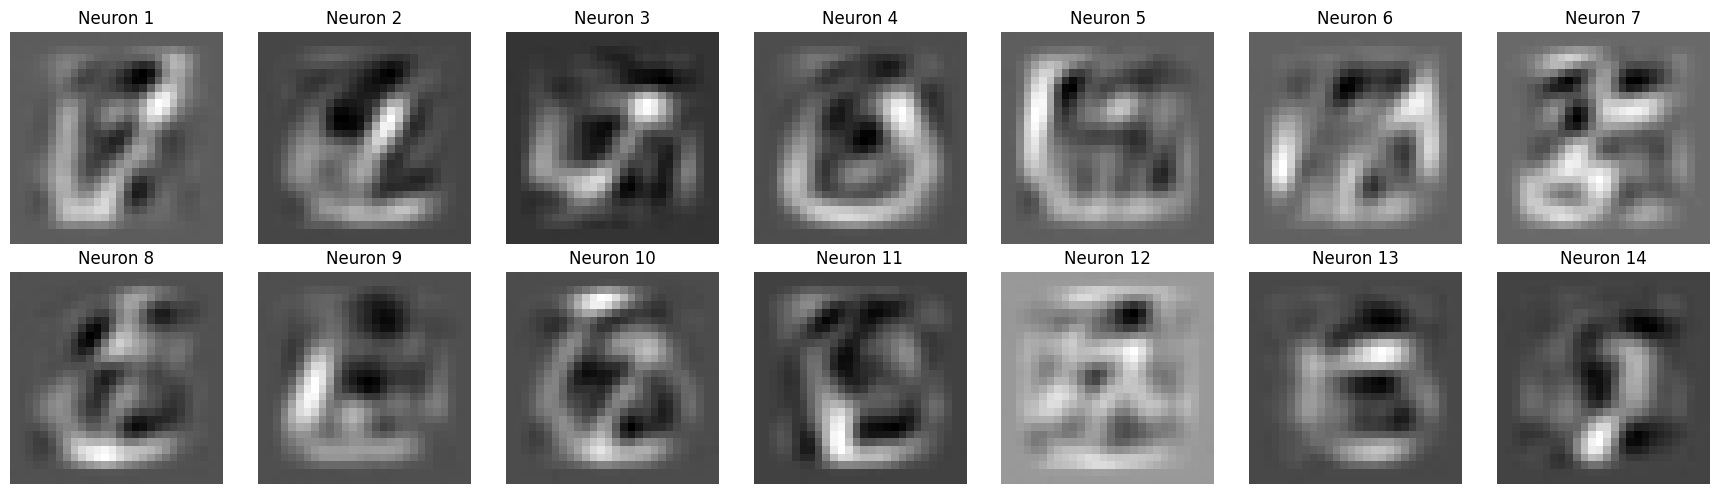

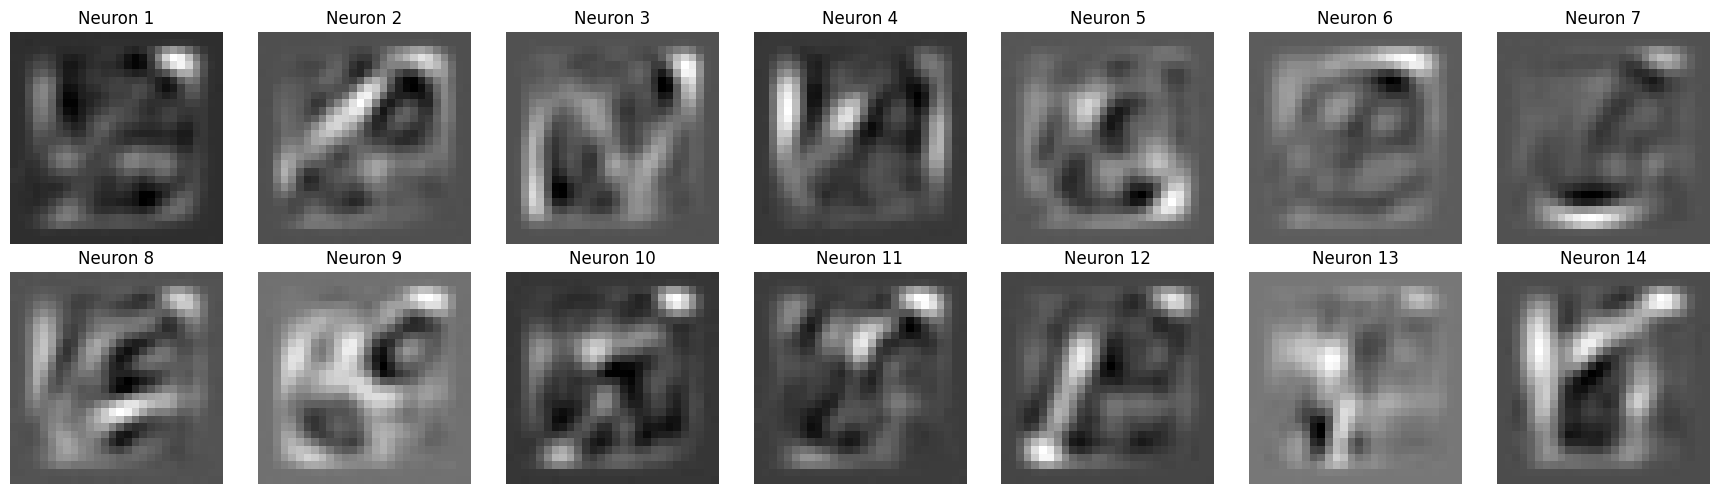

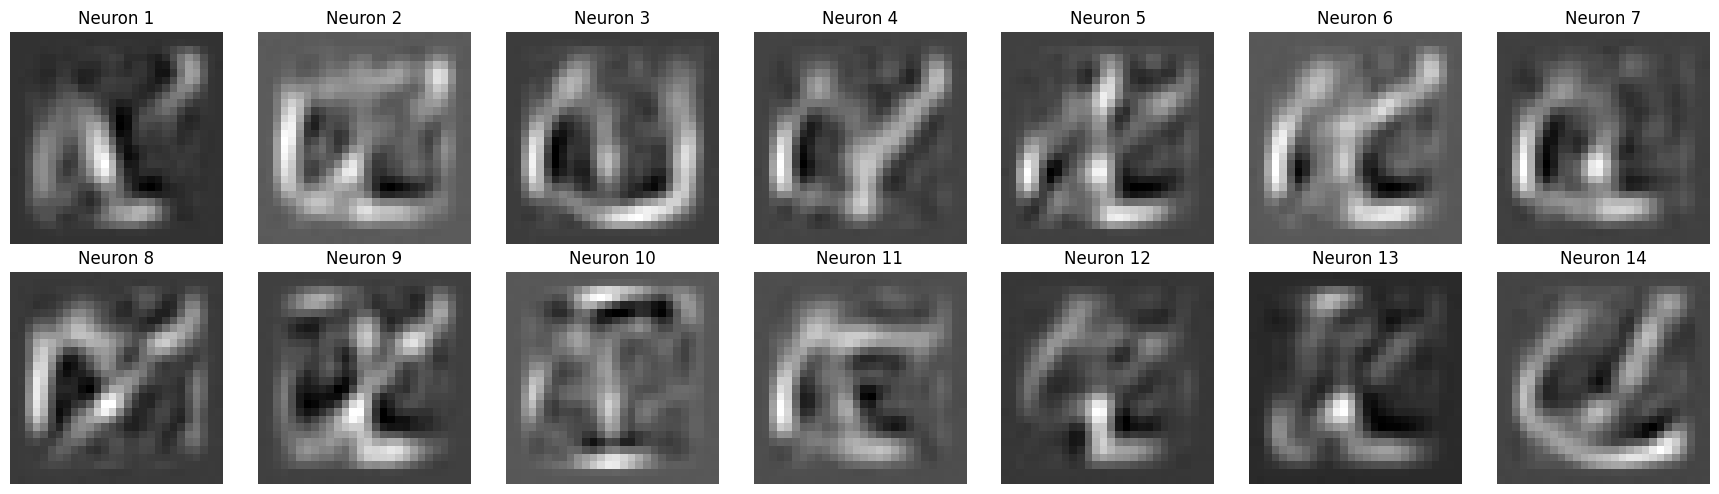

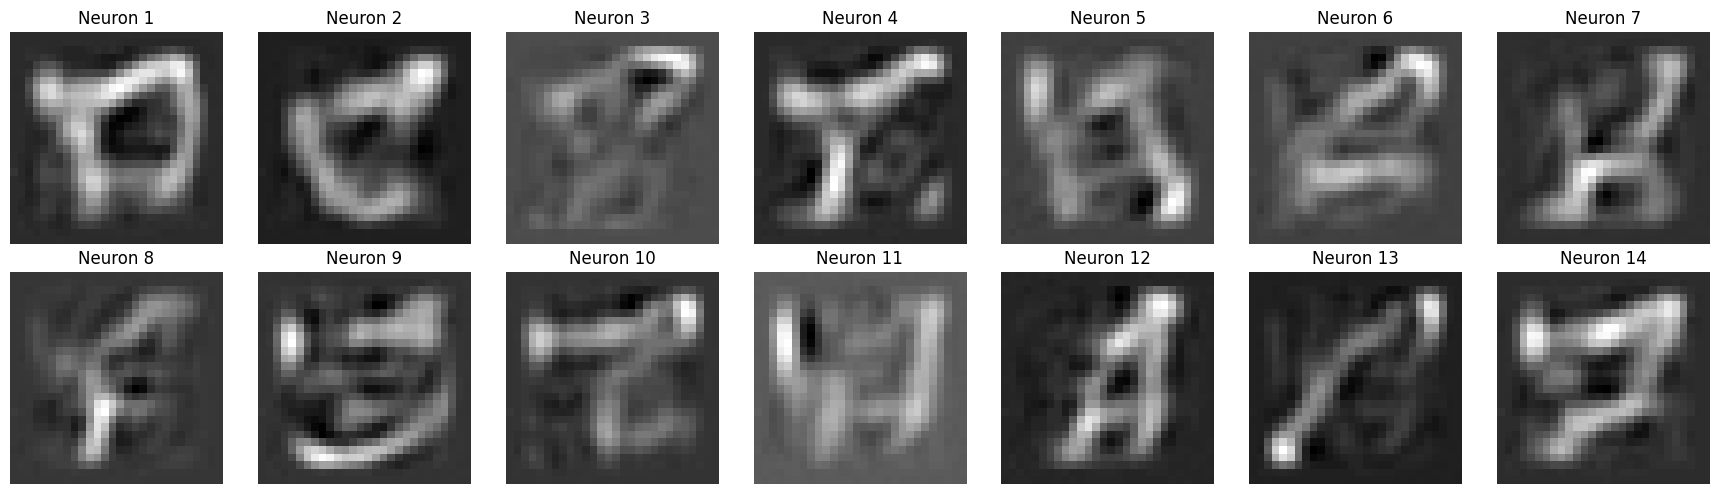

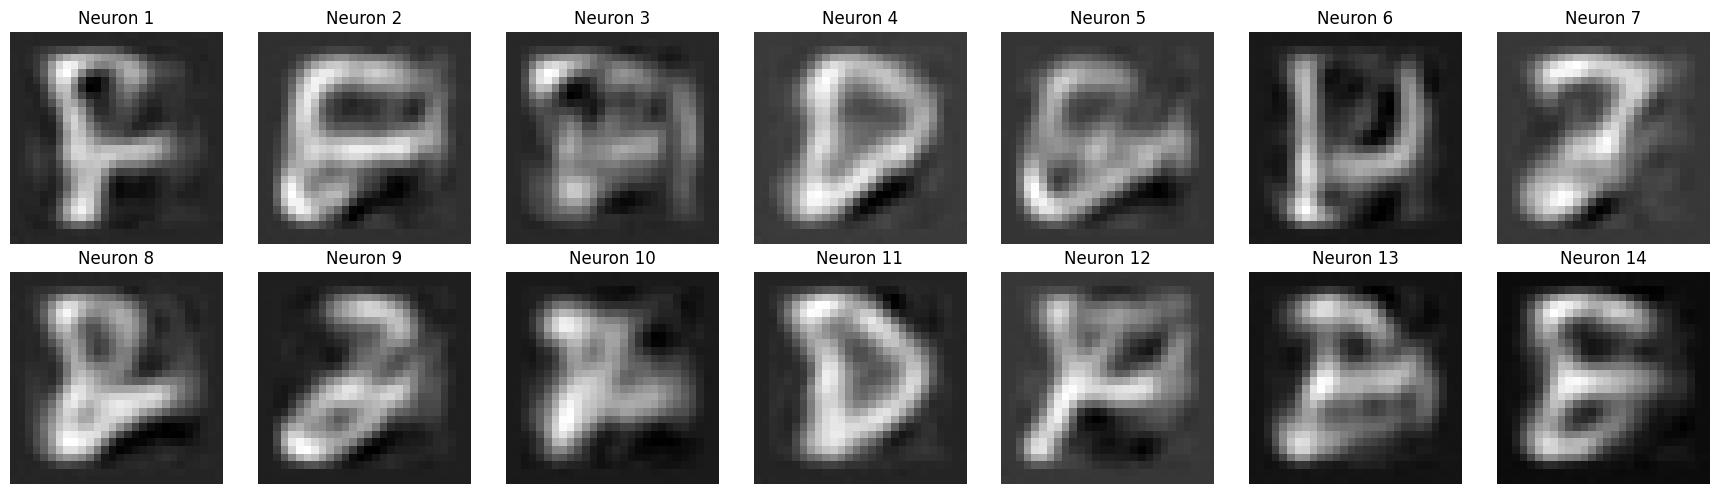

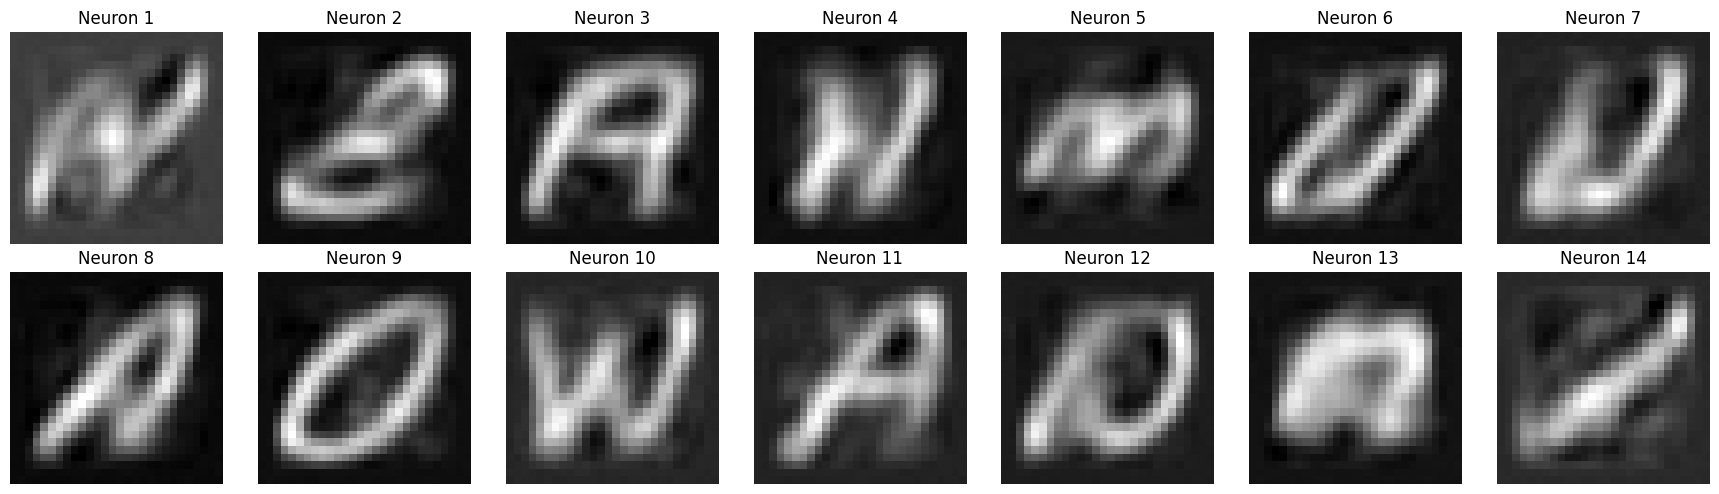

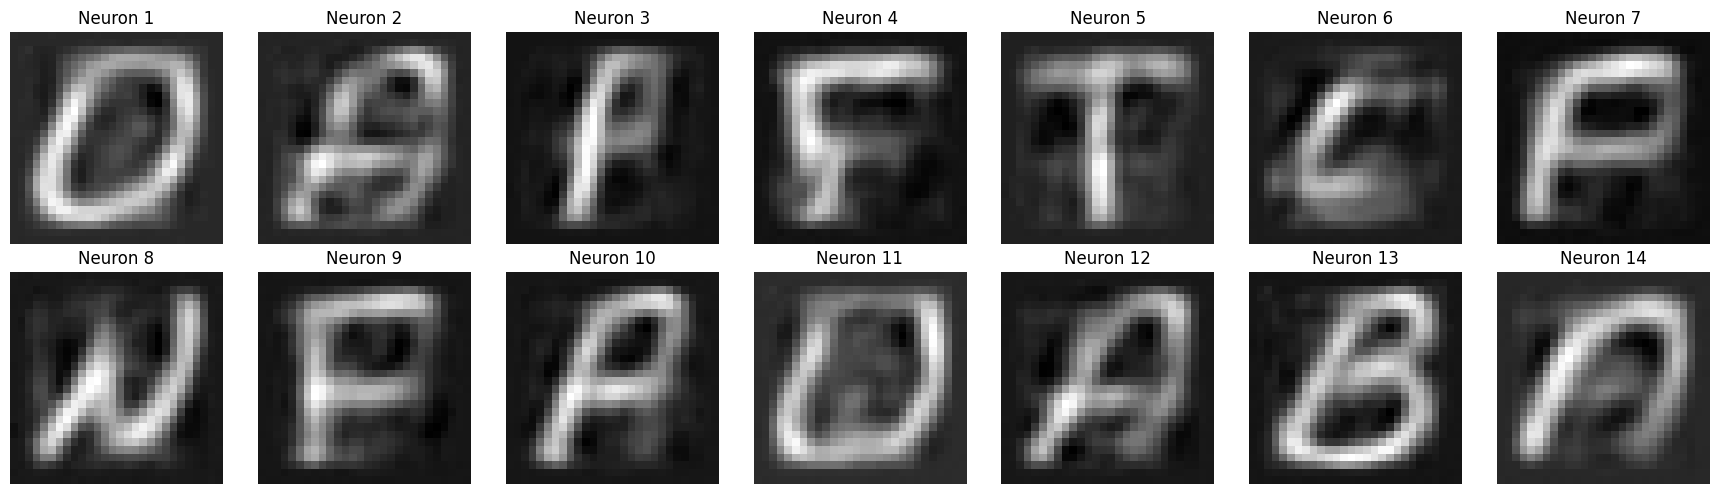

In [528]:
ld = 14

model_kwargs = {
    'input_dim': 28*28,
    'latent_dim': ld,
    'decrease_rate': 0.6,
    'device': device,
    'output_activation_encoder': nn.Sigmoid
}
model_path_kwargs = {
    'output_activation_encoder': 'sigmoid output',
    'train_type': 'simultaneous train',
    'latent_dim': f"{model_kwargs['latent_dim']}ld",
    'decrease_rate': '06',
    'learning_rate': '1e3',
    'train_num': 2,
}

for num_hidden_layers in range(1, 8):
    model_kwargs['hidden_layers'] = num_hidden_layers
    model_path_kwargs['num_hidden_layers'] = num_hidden_layers
    model_path_kwargs['dataset'] = 'EMNIST'

    my_model = load_model(model_path_kwargs, model_kwargs)

    visualize_bottleneck_neurons(my_model, device, img_shape=(28, 28), EMNIST=True)

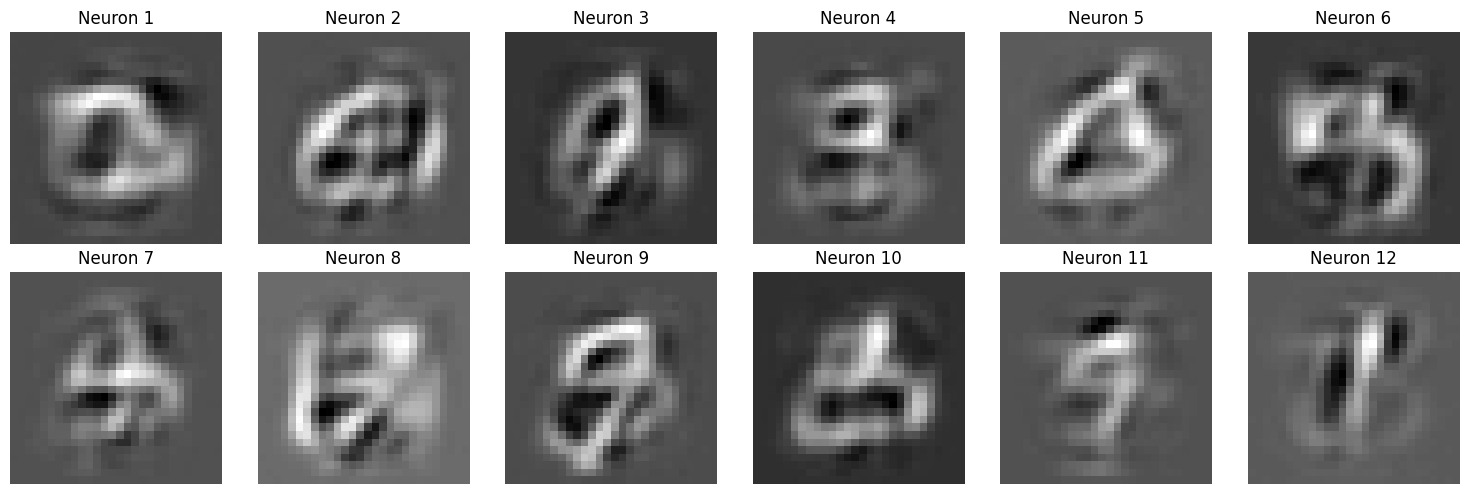

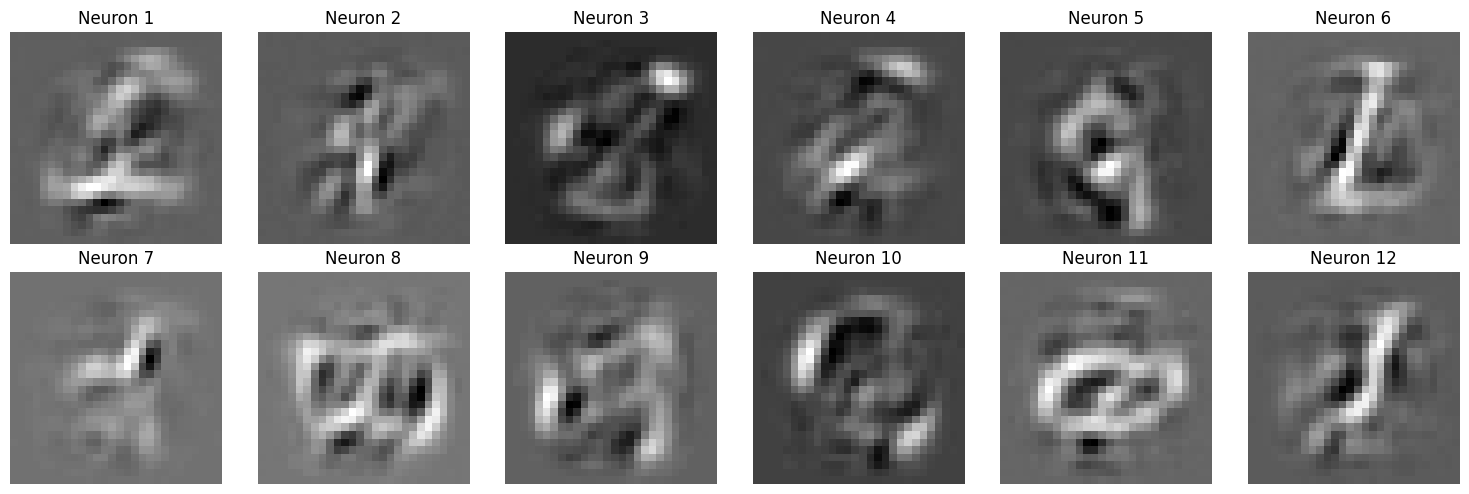

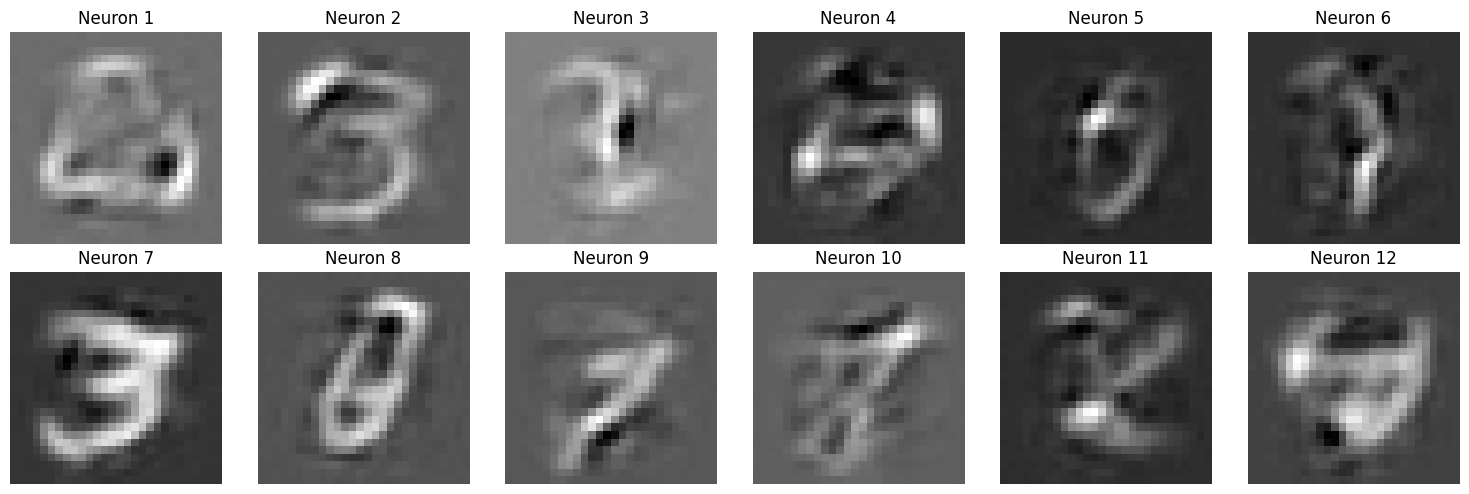

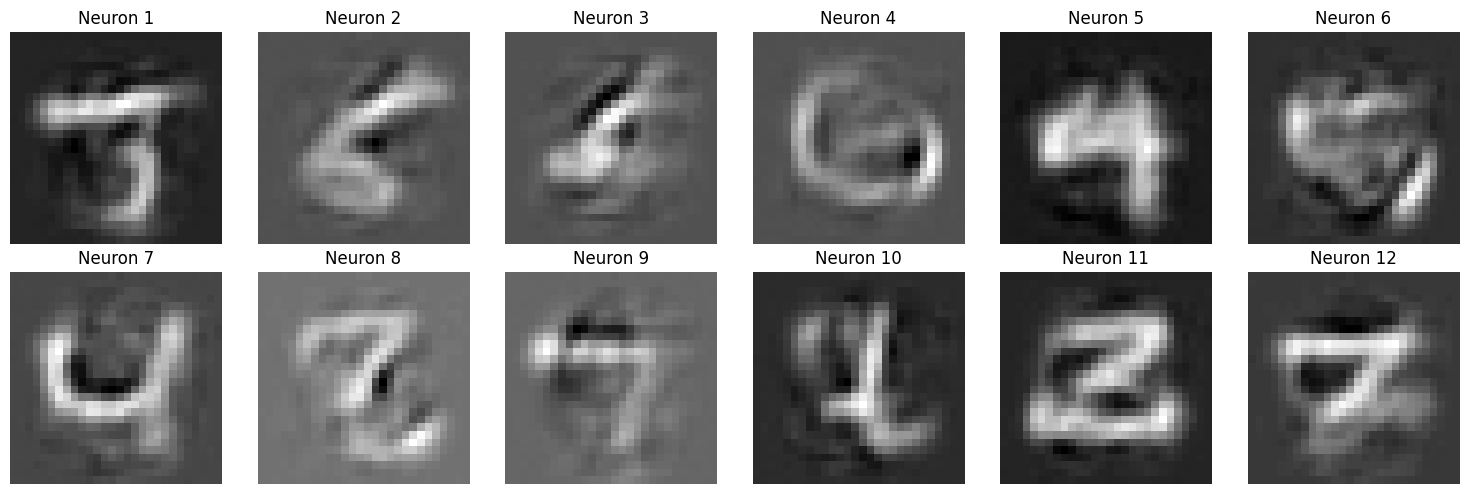

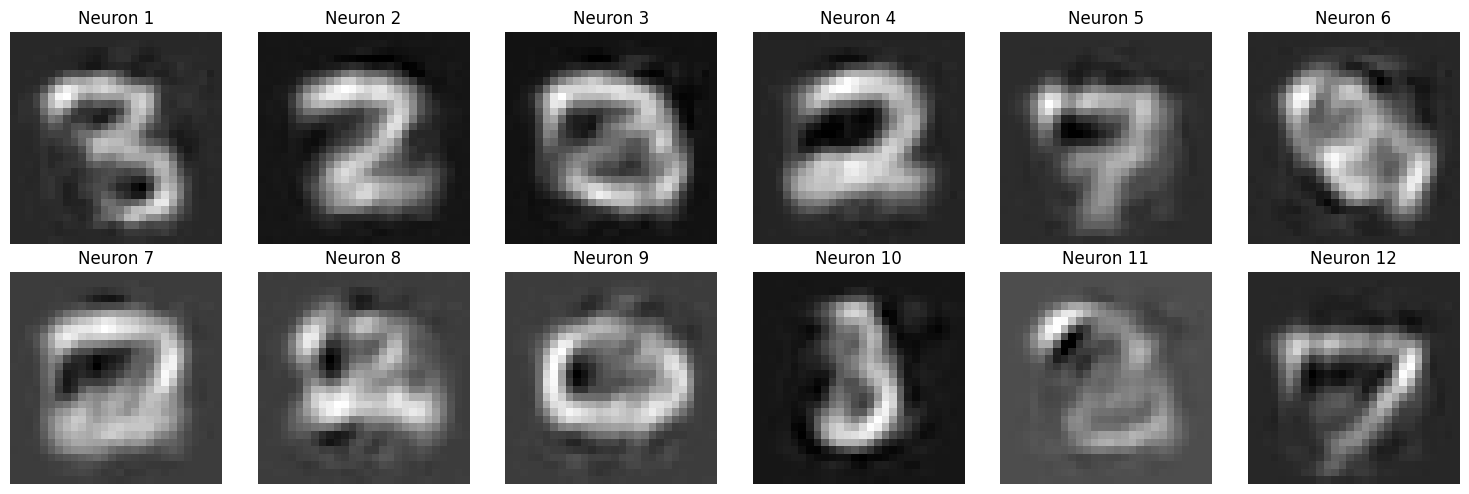

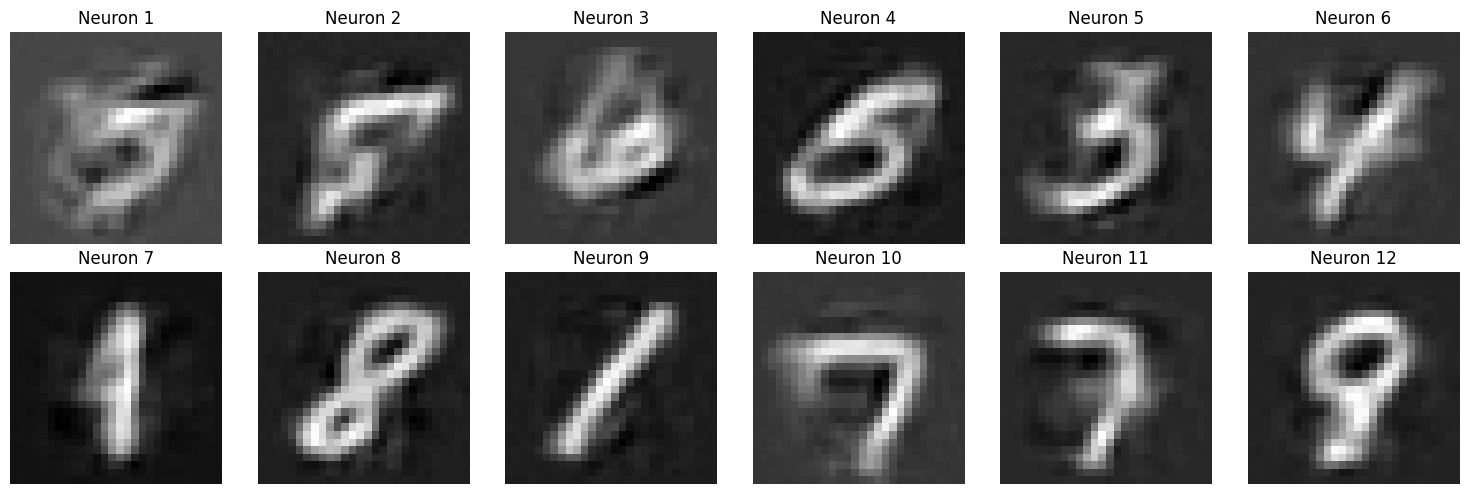

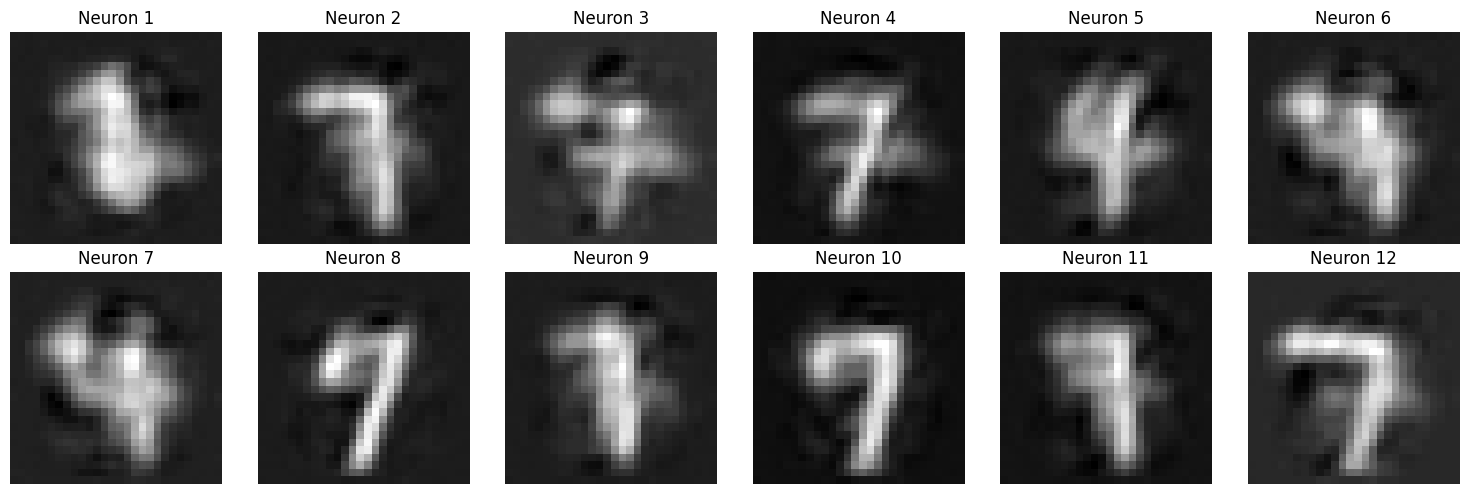

In [508]:
ld = 12

model_kwargs = {
    'input_dim': 28*28,
    'latent_dim': ld,
    'decrease_rate': 0.6,
    'device': device,
    'output_activation_encoder': nn.Sigmoid
}
model_path_kwargs = {
    'output_activation_encoder': 'sigmoid output',
    'train_type': 'simultaneous train',
    'latent_dim': f"{model_kwargs['latent_dim']}ld",
    'decrease_rate': '06',
    'learning_rate': '1e3',
    'train_num': 2,
}

for num_hidden_layers in range(1, 8):
    model_kwargs['hidden_layers'] = num_hidden_layers
    model_path_kwargs['num_hidden_layers'] = num_hidden_layers
    model_path_kwargs['dataset'] = 'MNIST'

    my_model = load_model(model_path_kwargs, model_kwargs)

    visualize_bottleneck_neurons(my_model, device, img_shape=(28, 28))

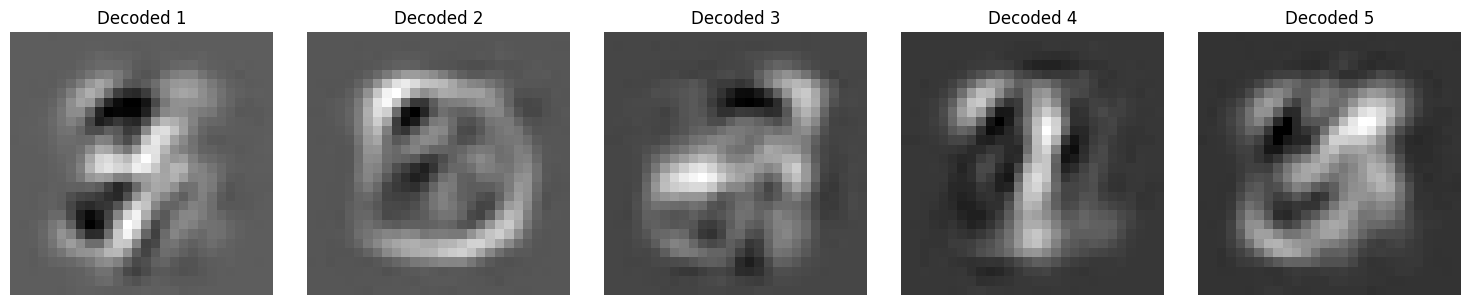

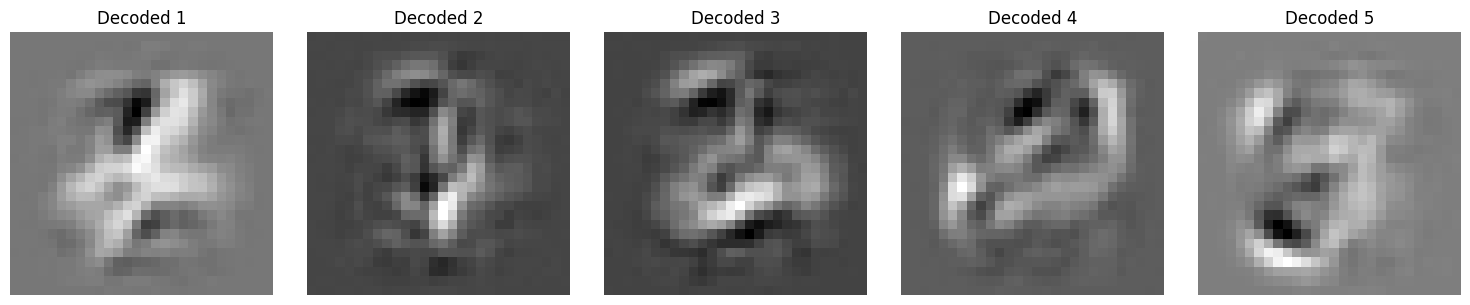

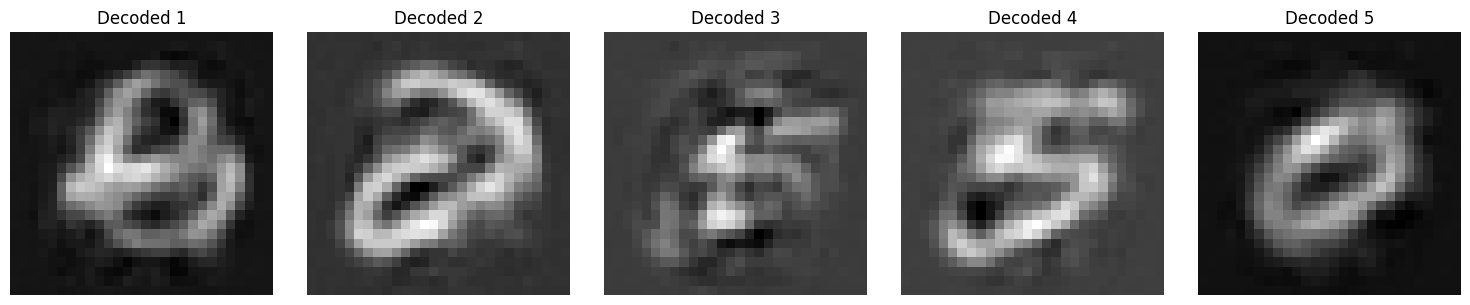

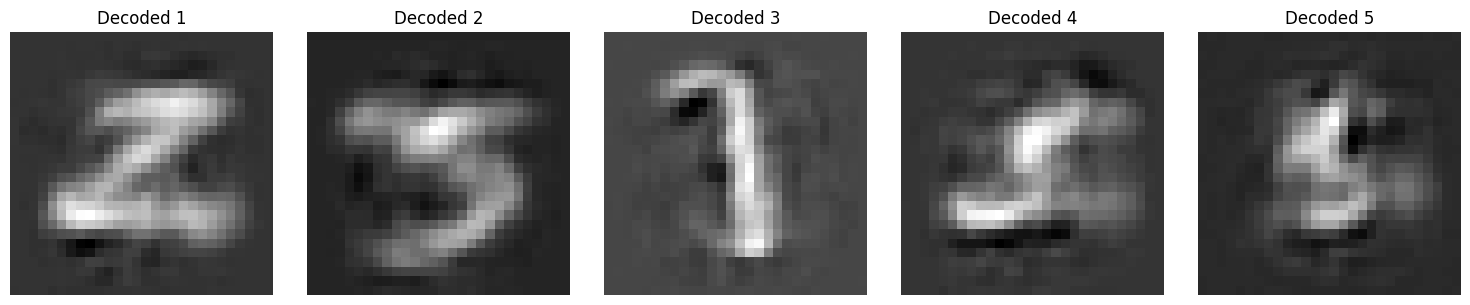

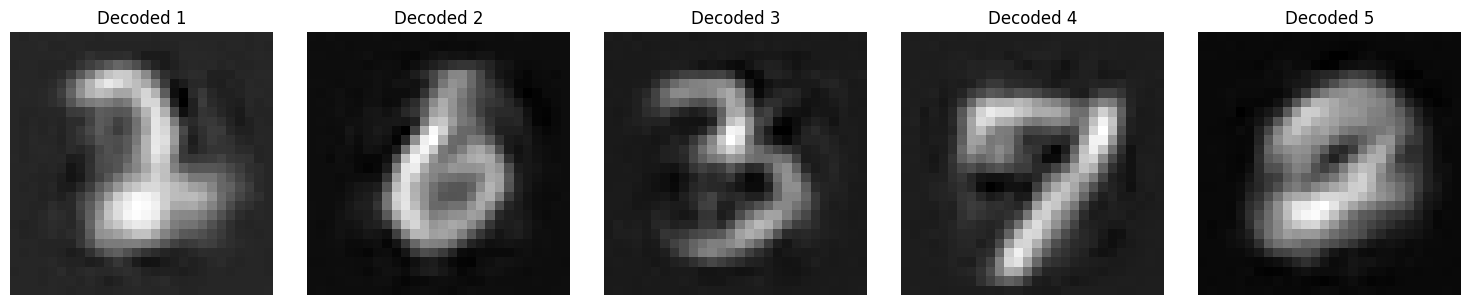

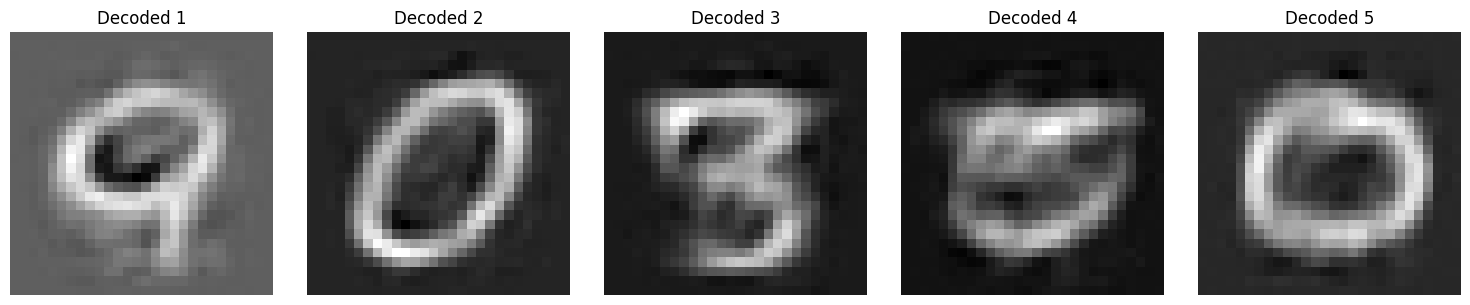

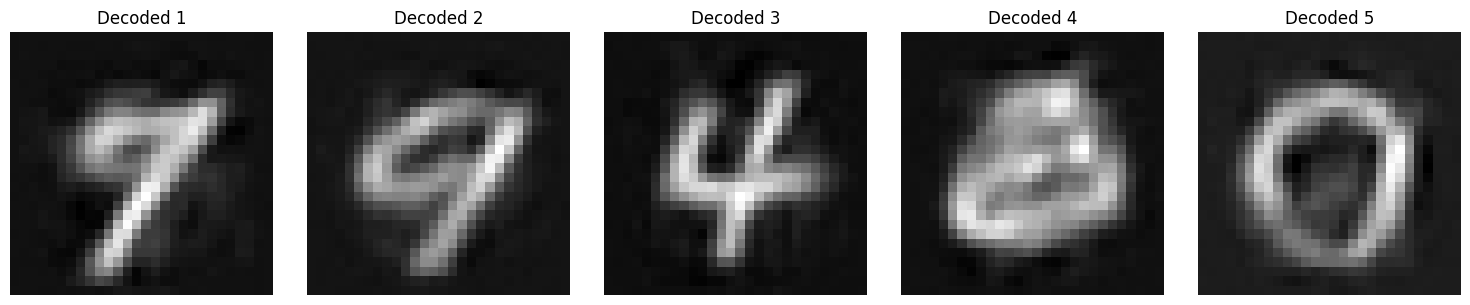

In [534]:
ld = 10

model_kwargs = {
    'input_dim': 28*28,
    'latent_dim': ld,
    'decrease_rate': 0.6,
    'device': device,
    'output_activation_encoder': nn.Sigmoid
}
model_path_kwargs = {
    'output_activation_encoder': 'sigmoid output',
    'train_type': 'simultaneous train',
    'latent_dim': f"{model_kwargs['latent_dim']}ld",
    'decrease_rate': '06',
    'learning_rate': '1e3',
    'train_num': 0,
}

for num_hidden_layers in range(1, 8):
    model_kwargs['hidden_layers'] = num_hidden_layers
    model_path_kwargs['num_hidden_layers'] = num_hidden_layers
    model_path_kwargs['dataset'] = 'MNIST'

    my_model = load_model(model_path_kwargs, model_kwargs)

    # For a batch of vectors
    latent_matrix = torch.randn(5, my_model.latent_dim)
    visualize_decoded_from_latent_vectors(my_model, latent_matrix, device)

In [535]:
2**14

16384

# Features/datapoints memorization

## Code

In [2]:
def find_closest_row(vector, matrix):
    """
    Returns the row index of the matrix whose row has the minimum Euclidean distance to the input vector.

    Args:
        vector (np.ndarray): 1D array of length n.
        matrix (np.ndarray): 2D array of shape (m, n).

    Returns:
        int: Index of the closest row.
    """
    # Compute Euclidean distances for each row
    distances = np.linalg.norm(matrix - vector, axis=1)
    # Return the index of the minimum distance
    return np.argmin(distances)

In [3]:
def compute_closest_rows(decoded_binary_matrix, datapoints_array):
    return np.array([find_closest_row(vec, datapoints_array) for vec in decoded_binary_matrix])

In [4]:
def binary_matrix(n):
    """
    Returns a numpy array of shape (2**n, n) where each row is the binary representation of numbers from 0 to 2**n-1.
    """
    numbers = np.arange(2**n)
    # Convert each number to binary and pad with zeros to length n
    bin_matrix = ((numbers[:, None] & (1 << np.arange(n)[::-1])) > 0).astype(np.float32)
    return bin_matrix


In [5]:
from AE.overlaps import load_model

def compute_decoded_binary_matrix(model_path_kwargs, model_kwargs):

    model = load_model(model_path_kwargs, model_kwargs)
    model.eval()
    with torch.no_grad():
        latent_matrix = torch.tensor(binary_matrix(model.latent_dim))
        decoded_matrix = model.decode(latent_matrix).cpu().numpy()
        return decoded_matrix

In [6]:
def compute_min_dist_datapoints_frequencies(closest_rows_indices, dataset_length=60000):
    datapoints_frequencies_array = np.zeros(dataset_length)
    unique, counts = np.unique(closest_rows_indices, return_counts=True)
    datapoints_frequencies_array[unique] = counts
    datapoints_frequencies_array /= np.sum(datapoints_frequencies_array)
    return datapoints_frequencies_array

def compute_min_dist_labels_frequencies(closest_rows_indices, labels_array):
    unique, counts = np.unique(labels_array[closest_rows_indices], return_counts=True)
    labels_frequencies_array = np.zeros(np.max(unique)+1)
    labels_frequencies_array[unique] = counts
    labels_frequencies_array /= np.sum(labels_frequencies_array)
    return labels_frequencies_array

In [9]:
def get_datapoints_labels_arrays(dataset_name):
    if dataset_name == 'MNIST':
        dataset = datasets.MNIST(
            '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
            train=True,
            download=True,
            transform=transforms.ToTensor()
            )
    elif dataset_name == 'EMNIST':
        dataset = datasets.EMNIST(
            '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
            split='balanced',
            train=True,
            download=True,
            transform=transforms.ToTensor()
            )
    elif dataset_name == '2MNISTonly':
        dataset = MNISTDigit2OnlyDataset(train=True, download=True)
    elif dataset_name == '2MNIST':
        dataset = MNISTDigit2Dataset(train=True, download=True, target_size=60000)
    elif dataset_name == 'FEMNIST':
        dataset = FEMNISTDataset(train=True, download=True)
    else:
        raise ValueError(f"Unknown dataset name: {dataset_name}")

    datapoints_array = []
    labels_array = []
    for img, lbl in dataset:
        datapoints_array.append(img.numpy().flatten())
        labels_array.append(lbl)
    datapoints_array = np.array(datapoints_array)
    labels_array = np.array(labels_array)

    sorting_permutation = np.argsort(labels_array)

    labels_array = labels_array[sorting_permutation]
    datapoints_array = datapoints_array[sorting_permutation]

    return datapoints_array, labels_array

In [11]:
def compute_min_distances_frequencies(model_path_kwargs, model_kwargs, datapoints_array, labels_array):
    decoded_binary_matrix = compute_decoded_binary_matrix(model_path_kwargs, model_kwargs)
    closest_rows_indices = compute_closest_rows(decoded_binary_matrix, datapoints_array)
    datapoints_frequencies = compute_min_dist_datapoints_frequencies(closest_rows_indices, dataset_length=datapoints_array.shape[0])
    labels_frequencies = compute_min_dist_labels_frequencies(closest_rows_indices, labels_array)
    return datapoints_frequencies, labels_frequencies

In [ ]:
def plot_labels_frequencies_histogram(labels_frequencies, colour_segmentation=None, title="Label Frequencies Histogram"):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(8, 5))
    n = len(labels_frequencies)
    colors = plt.cm.viridis.colors  # 10 distinct colors

    if colour_segmentation is not None:
        indices = [int(x) for x in colour_segmentation.values()]
        indices.append(n)
        for i in range(len(indices)-1):
            start = indices[i]
            end = indices[i+1]
            plt.bar(range(start, end), labels_frequencies[start:end], width=1.5, color=colors[i % len(colors)], label=f'Label {i}')
        plt.legend()
    else:
        plt.bar(range(n), labels_frequencies)

    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.xticks([])
    plt.title(title)
    plt.show()

In [68]:
def plot_labels_frequencies_histogram(labels_frequencies, first_indices=None, title="Label Frequencies Histogram", cmap_name='inferno'):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(8, 5))
    n = len(labels_frequencies)
    cmap = plt.get_cmap(cmap_name)

    if first_indices is not None:
        indices = [int(x) for x in first_indices.values()]
        indices.append(n)
        num_segments = len(indices) - 1
        colors = [cmap(i / max(num_segments - 1, 1)) for i in range(num_segments)]
        for i in range(num_segments):
            start = indices[i]
            end = indices[i+1]
            plt.bar(range(start, end), labels_frequencies[start:end], width=1.5, color=colors[i], label=f'Label {i}')
        plt.legend()
    else:
        plt.bar(range(n), labels_frequencies)

    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.xticks([])
    plt.title(title)
    plt.show()

In [11]:
def find_first_occurrences(labels_array):
    """
    Returns a dictionary mapping each unique label to the index of its first occurrence in labels_array.
    """
    first_indices = {}
    unique_labels = np.unique(labels_array)
    for label in unique_labels:
        first_indices[label] = np.where(labels_array == label)[0][0]
    return first_indices

## final func

In [7]:
def compute_datapoints_labels_freq_list(dataset, ld, datapoints_array, labels_array, save_dir=None):

    model_kwargs = {
        'input_dim': 28*28,
        'latent_dim': ld,
        'decrease_rate': 0.6,
        'device': device,
        'output_activation_encoder': nn.Sigmoid
    }
    model_path_kwargs = {
        'output_activation_encoder': 'sigmoid output',
        'train_type': 'simultaneous train',
        'latent_dim': f"{model_kwargs['latent_dim']}ld",
        'decrease_rate': '06',
        'learning_rate': '1e3',
        'train_num': 0,
    }
    model_path_kwargs['dataset'] = dataset


    repetitions = range(6)
    hidden_layers = range(1, 8)

    datapoints_freq_list = []
    labels_freq_list = []

    for repetition in repetitions:
        datapoints_freq_hl = []
        labels_freq_hl = []

        for num_hidden_layers in hidden_layers:
            model_kwargs['hidden_layers'] = num_hidden_layers
            model_path_kwargs['num_hidden_layers'] = num_hidden_layers

            datapoints_frequencies, labels_frequencies = compute_min_distances_frequencies(
                model_path_kwargs, model_kwargs, datapoints_array, labels_array
            )

            datapoints_freq_hl.append(datapoints_frequencies)
            labels_freq_hl.append(labels_frequencies)
            
        datapoints_freq_list.append(datapoints_freq_hl)
        labels_freq_list.append(labels_freq_hl)

    repetitions_hl_datapoints_freq_array = np.array(datapoints_freq_list)
    repetitions_hl_labels_freq_array = np.array(labels_freq_list)

    if save_dir is not None:
        with open(f"{save_dir}/datapoints_freq_list_{dataset}_{ld}ld.pkl", "wb") as f:
            pickle.dump(repetitions_hl_datapoints_freq_array, f)
        with open(f"{save_dir}/labels_freq_list_{dataset}_{ld}ld.pkl", "wb") as f:
            pickle.dump(repetitions_hl_labels_freq_array, f)

    return repetitions_hl_datapoints_freq_array, repetitions_hl_labels_freq_array

In [10]:
dataset = 'MNIST'
ld = 10
datapoints_array, labels_array = get_datapoints_labels_arrays(dataset, train=True)
datapoints_freq_list, labels_freq_list = compute_datapoints_labels_freq_list(dataset, ld=ld, datapoints_array=datapoints_array, labels_array=labels_array, save_dir="../savings/features freq")

In [15]:
from AE.overlaps import plot_multiple_labels_frequencies_histograms, plot_multiple_unique_frequencies_histograms

In [12]:
def extract_nonzero_freq_per_hidden_layer(hl_datapoints_freq, labels_array):
    """
    For each hidden layer, extracts nonzero datapoint frequencies, corresponding labels,
    and computes unique frequencies and their counts.

    Args:
        hl_datapoints_freq (np.ndarray): Array of shape (n_hidden_layers, n_datapoints).
        labels_array (np.ndarray): Array of shape (n_datapoints,).

    Returns:
        hl_nonzero_datapoints_frequencies (list of np.ndarray): Nonzero frequencies per hidden layer.
        hl_nonzero_labels (list of np.ndarray): Corresponding labels per hidden layer.
    """
    hl_nonzero_datapoints_frequencies = []
    hl_nonzero_labels = []

    for hl in range(hl_datapoints_freq.shape[0]):
        current_hl_nonzero_datapoints_freq = hl_datapoints_freq[hl][hl_datapoints_freq[hl] != 0]
        current_hl_nonzero_labels = labels_array[hl_datapoints_freq[hl] != 0]

        hl_nonzero_datapoints_frequencies.append(current_hl_nonzero_datapoints_freq)
        hl_nonzero_labels.append(current_hl_nonzero_labels)


    return hl_nonzero_datapoints_frequencies, hl_nonzero_labels

In [13]:
def extract_unique_freq_counts_per_hidden_layer(hl_datapoints_freq):
    """
    For each hidden layer, extracts nonzero datapoint frequencies, corresponding labels,
    and computes unique frequencies and their counts.

    Args:
        hl_datapoints_freq (np.ndarray): Array of shape (n_hidden_layers, n_datapoints).
        labels_array (np.ndarray): Array of shape (n_datapoints,).

    Returns:
        hl_unique_frequencies (list of np.ndarray): Unique frequencies per hidden layer.
        hl_unique_counts (list of np.ndarray): Counts of unique frequencies per hidden layer.
    """

    hl_unique_frequencies = []
    hl_unique_counts = []

    for hl in range(hl_datapoints_freq.shape[0]):
        
        current_hl_nonzero_datapoints_freq = hl_datapoints_freq[hl][hl_datapoints_freq[hl] != 0]
        current_unique_frequencies, current_unique_counts = np.unique(current_hl_nonzero_datapoints_freq, return_counts=True)
        
        hl_unique_frequencies.append(current_unique_frequencies)
        hl_unique_counts.append(current_unique_counts)

    return hl_unique_frequencies, hl_unique_counts

In [47]:
from AE.overlaps import plot_multiple_unique_frequencies_lines

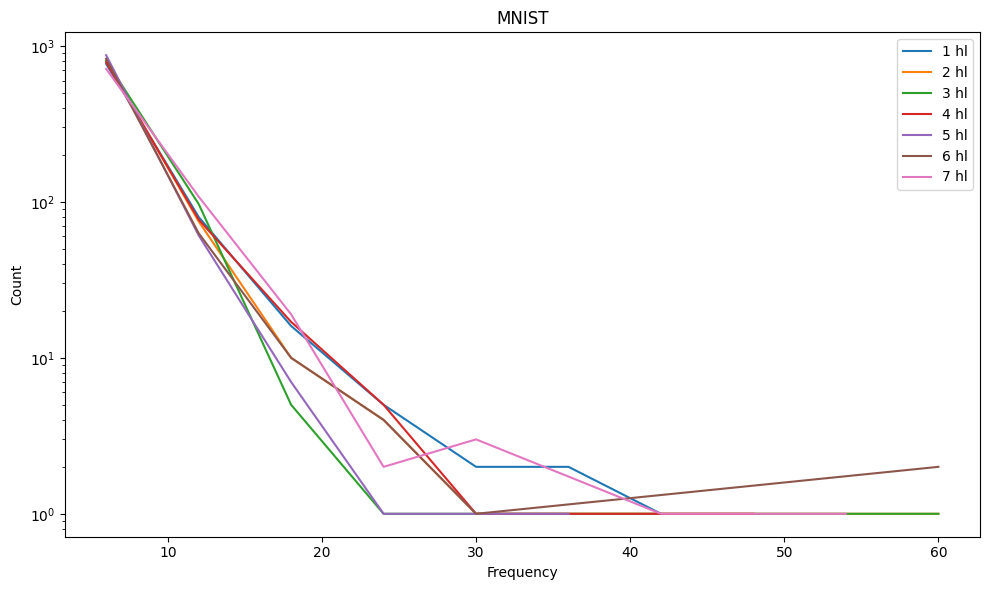

In [49]:
hl_datapoints_freq_sum = np.sum(datapoints_freq_list, axis=0)
hl_unique_frequencies, hl_unique_counts = extract_unique_freq_counts_per_hidden_layer(hl_datapoints_freq_sum)

plot_multiple_unique_frequencies_lines(hl_unique_frequencies, hl_unique_counts, cmap_name='tab10', title='MNIST')

In [55]:
def plot_multiple_unique_frequencies_histograms():
    return

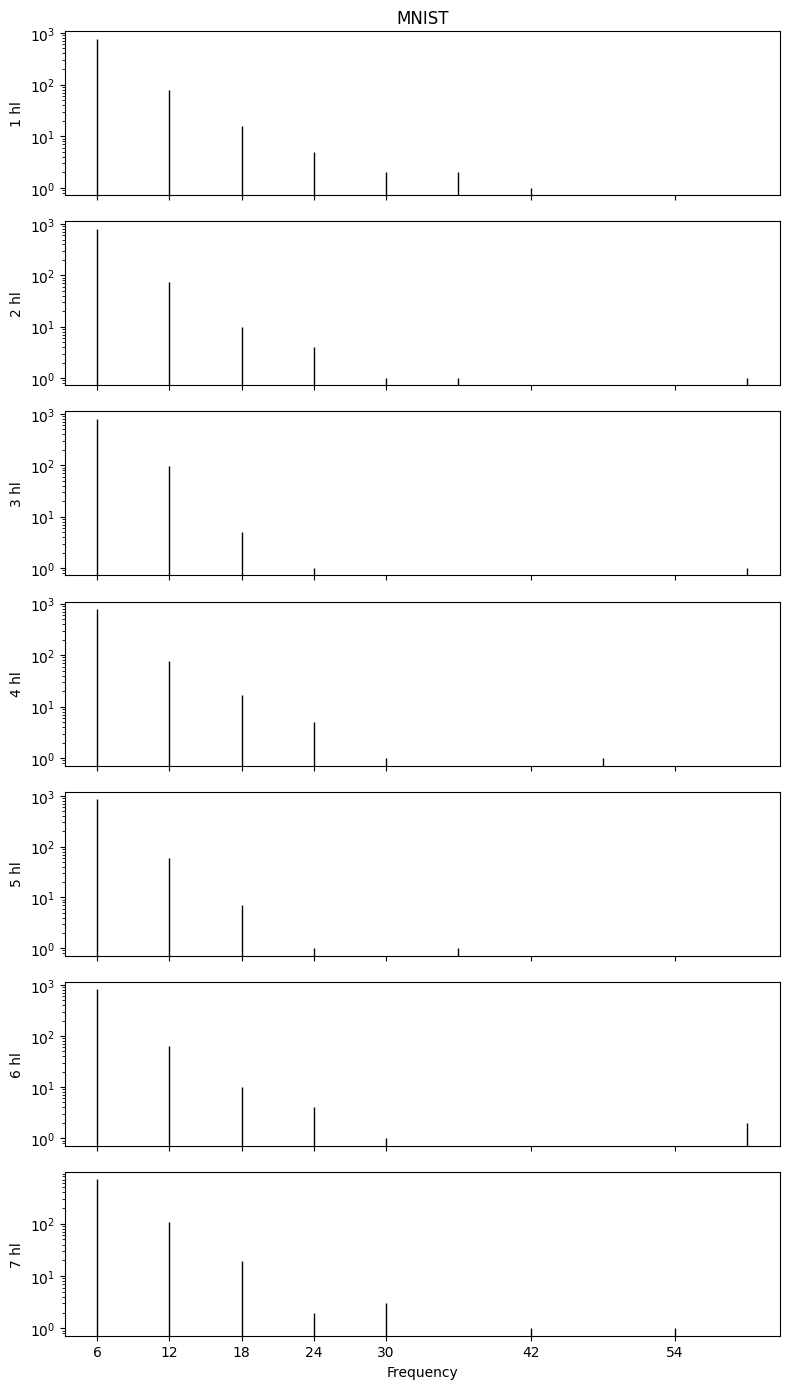

In [57]:
from AE.overlaps import plot_multiple_unique_frequencies_histograms

hl_datapoints_freq_sum = np.sum(datapoints_freq_list, axis=0)
hl_unique_frequencies, hl_unique_counts = extract_unique_freq_counts_per_hidden_layer(hl_datapoints_freq_sum)

plot_multiple_unique_frequencies_histograms(hl_unique_frequencies, hl_unique_counts, title = dataset)

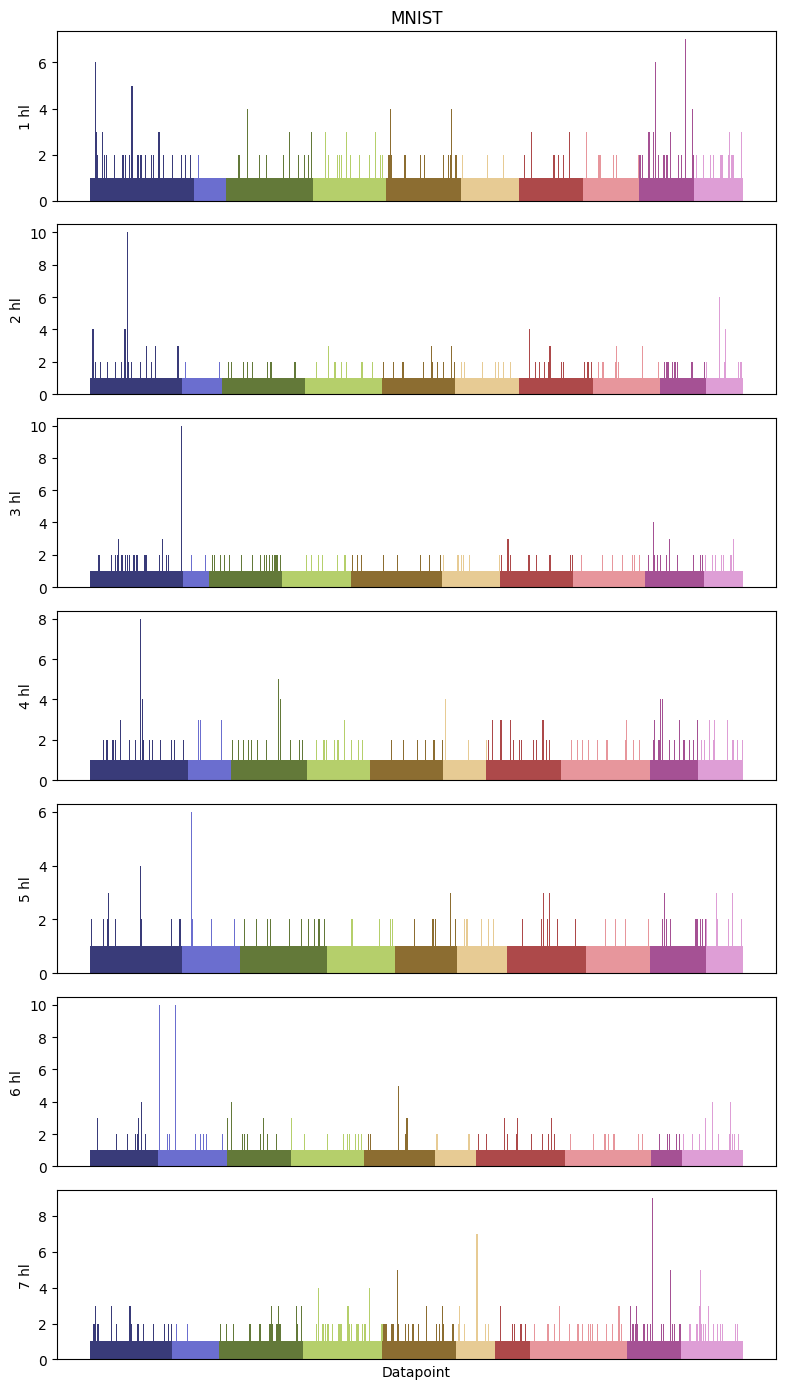

In [ ]:

hl_datapoints_freq_mean = np.mean(datapoints_freq_list, axis=0)
hl_datapoints_nonzero_frequencies, hl_nonzero_labels = extract_nonzero_freq_per_hidden_layer(hl_datapoints_freq_mean, labels_array)
plot_multiple_labels_frequencies_histograms(hl_datapoints_nonzero_frequencies, hl_nonzero_labels, dataset, cmap_name='tab20b')

In [ ]:
ld = 10
dataset = 'MNIST'

with open(f"../savings/features freq/datapoints_freq_list_{dataset}_{ld}ld.pkl", "rb") as f:
    datapoints_freq_list = pickle.load(f)
with open(f"../savings/features freq/labels_freq_list_{dataset}_{ld}ld.pkl", "rb") as f:
    labels_freq_list = pickle.load(f)


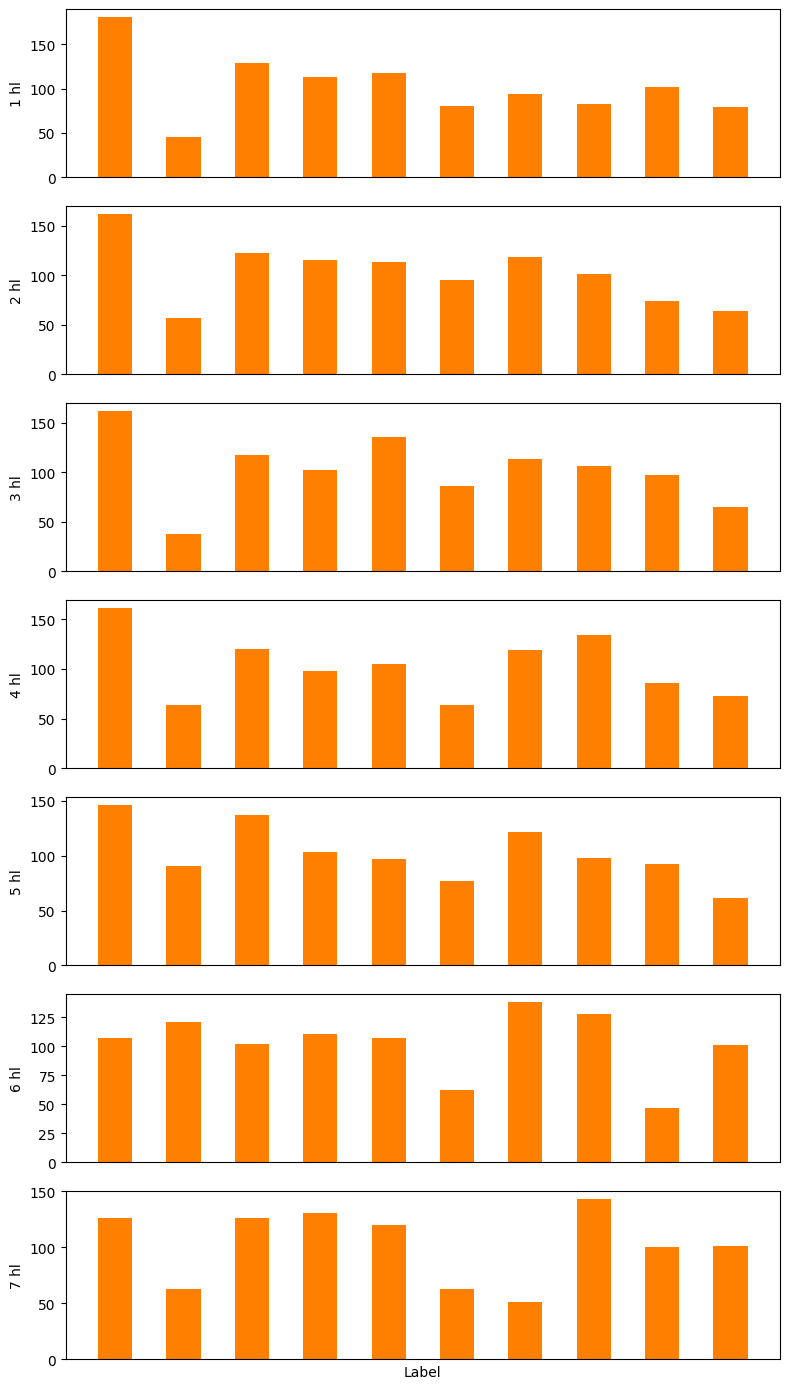

In [51]:
hl_labels_freq_mean = np.mean(labels_freq_list, axis=0)
plot_multiple_labels_frequencies_histograms(hl_labels_freq_mean, cmap_name='autumn')

## to delete